# Data Preprocessing

In [2]:
import pandas as pd
import numpy as np
import os
import sys
import matplotlib.pyplot as plt
import seaborn as sns   

In [3]:
#globally set column display options
pd.options.display.max_columns = None
pd.options.display.max_rows = None

In [4]:
#Load and Preview Data

In [5]:
#base path to processed data
processed_base="../data/processed"

#list of files to be read
shot_events = [
    'ligue1_21_22_shots',
    'ligue1_22_23_shots', 
    ]

#dictionary to store all the dataframes
dfs={}

for event in shot_events:
    print(f'Creating dataframe with {event}')

    shot_events_path = os.path.join(processed_base,f'{event}.csv')

    df = pd.read_csv(shot_events_path)
    
    dfs[event]=df #store in df in dictionary

    print(f" {event} has {df.shape[0]} rows and {df.shape[1]} columns")

Creating dataframe with ligue1_21_22_shots
 ligue1_21_22_shots has 681 rows and 44 columns
Creating dataframe with ligue1_22_23_shots
 ligue1_22_23_shots has 851 rows and 45 columns


In [6]:
dfs.keys()

dict_keys(['ligue1_21_22_shots', 'ligue1_22_23_shots'])

In [7]:
print(f'\nLigue 1 (21-22) column headings: \n{dfs["ligue1_21_22_shots"].columns.to_list()}')
print(f'\nLigue 1 (22-23) column headings: \n{dfs["ligue1_22_23_shots"].columns.to_list()}')


Ligue 1 (21-22) column headings: 
['id', 'index', 'period', 'timestamp', 'minute', 'second', 'possession', 'location', 'duration', 'related_events', 'type.id', 'type.name', 'possession_team.id', 'possession_team.name', 'play_pattern.id', 'play_pattern.name', 'team.id', 'team.name', 'player.id', 'player.name', 'position.id', 'position.name', 'shot.one_on_one', 'shot.statsbomb_xg', 'shot.end_location', 'shot.key_pass_id', 'shot.technique.id', 'shot.technique.name', 'shot.body_part.id', 'shot.body_part.name', 'shot.type.id', 'shot.type.name', 'shot.outcome.id', 'shot.outcome.name', 'shot.freeze_frame', 'under_pressure', 'shot.aerial_won', 'out', 'shot.first_time', 'shot.deflected', 'shot.open_goal', 'off_camera', 'shot.saved_to_post', 'shot.redirect']

Ligue 1 (22-23) column headings: 
['id', 'index', 'period', 'timestamp', 'minute', 'second', 'possession', 'location', 'duration', 'related_events', 'type.id', 'type.name', 'possession_team.id', 'possession_team.name', 'play_pattern.id', '

In [8]:
#check if similar column headings

from collections import Counter

In [9]:
column_counts = Counter()

for name, df in dfs.items():
    column_counts.update(df.columns)

# Total number of DataFrames
n_dfs = len(dfs)

non_overlapping_columns= [col for col, count in column_counts.items() if count < n_dfs]
print("Non overlapping columns:",non_overlapping_columns)

Non overlapping columns: ['shot.redirect', 'shot.follows_dribble', 'shot.saved_off_target']


Non overlapping columns will be dropped prior to merge 

Non overlapping columns removed for data consistency 

In [10]:
final_column_counts = Counter()

for name, df in dfs.items():
    df=df.copy()

    #drop columns from dfs that exist in non overlapping columns
    cols_to_drop = [col for col in non_overlapping_columns if col in df.columns]

    if cols_to_drop:
        df.drop(cols_to_drop,axis=1, inplace=True)

    #update dictionary with updated df
    dfs[name] = df

    #track changes
    final_column_counts.update(df.columns)


# 1st check: How many times columns appear in dictionary
print("\n Final column appearance across datasets:")
for col, count in final_column_counts.items():
    print(f"{col}: {count} times")

# Check number of columns shared across Dataframes 
all_column_sets = [set(df.columns) for df in dfs.values()]
shared_cols = set.intersection(*all_column_sets)
print(f"\n Number of shared columns across all DataFrames: {len(shared_cols)}")
print(f" Shared Columns: {sorted(shared_cols)}")

# Confirmation check 
unique_column_sets = set(map(lambda cols: tuple(sorted(cols)), all_column_sets))
if len(unique_column_sets) == 1:
    print("\n All DataFrames now have the same columns. Ready to concatenate!")
else:
    print("\n Not all DataFrames have identical columns. Check for leftover inconsistencies.")



 Final column appearance across datasets:
id: 2 times
index: 2 times
period: 2 times
timestamp: 2 times
minute: 2 times
second: 2 times
possession: 2 times
location: 2 times
duration: 2 times
related_events: 2 times
type.id: 2 times
type.name: 2 times
possession_team.id: 2 times
possession_team.name: 2 times
play_pattern.id: 2 times
play_pattern.name: 2 times
team.id: 2 times
team.name: 2 times
player.id: 2 times
player.name: 2 times
position.id: 2 times
position.name: 2 times
shot.one_on_one: 2 times
shot.statsbomb_xg: 2 times
shot.end_location: 2 times
shot.key_pass_id: 2 times
shot.technique.id: 2 times
shot.technique.name: 2 times
shot.body_part.id: 2 times
shot.body_part.name: 2 times
shot.type.id: 2 times
shot.type.name: 2 times
shot.outcome.id: 2 times
shot.outcome.name: 2 times
shot.freeze_frame: 2 times
under_pressure: 2 times
shot.aerial_won: 2 times
out: 2 times
shot.first_time: 2 times
shot.deflected: 2 times
shot.open_goal: 2 times
off_camera: 2 times
shot.saved_to_post: 

In [11]:
#add tag for different dataframes
for name, df in dfs.items():
    df['source'] = name
    dfs[name] = df #updating the df

In [12]:
print(f'\nLigue 1 (21-22) column headings: \n{dfs["ligue1_21_22_shots"].columns.to_list()}')
print(f'\nLigue 1 (22-23) column headings: \n{dfs["ligue1_22_23_shots"].columns.to_list()}')


Ligue 1 (21-22) column headings: 
['id', 'index', 'period', 'timestamp', 'minute', 'second', 'possession', 'location', 'duration', 'related_events', 'type.id', 'type.name', 'possession_team.id', 'possession_team.name', 'play_pattern.id', 'play_pattern.name', 'team.id', 'team.name', 'player.id', 'player.name', 'position.id', 'position.name', 'shot.one_on_one', 'shot.statsbomb_xg', 'shot.end_location', 'shot.key_pass_id', 'shot.technique.id', 'shot.technique.name', 'shot.body_part.id', 'shot.body_part.name', 'shot.type.id', 'shot.type.name', 'shot.outcome.id', 'shot.outcome.name', 'shot.freeze_frame', 'under_pressure', 'shot.aerial_won', 'out', 'shot.first_time', 'shot.deflected', 'shot.open_goal', 'off_camera', 'shot.saved_to_post', 'source']

Ligue 1 (22-23) column headings: 
['id', 'index', 'period', 'timestamp', 'minute', 'second', 'possession', 'location', 'duration', 'related_events', 'type.id', 'type.name', 'possession_team.id', 'possession_team.name', 'play_pattern.id', 'play_pa

In [13]:
#concatnate
df = pd.concat(dfs.values(),axis='rows',join='outer', ignore_index=True)

#concatenate by rows and did outer join which should stack the dataframes vertically
#and merge and keep all columns that are same
#this should ensure data integrity and proper alignment of data in final merged dataframe

print(f"Dataset has {df.shape[0]} rows and {df.shape[1]} columns")

Dataset has 1532 rows and 44 columns


In [14]:
#preview dataframe
df.head(3)

,id,index,period,timestamp,minute,second,possession,location,duration,related_events,type.id,type.name,possession_team.id,possession_team.name,play_pattern.id,play_pattern.name,team.id,team.name,player.id,player.name,position.id,position.name,shot.one_on_one,shot.statsbomb_xg,shot.end_location,shot.key_pass_id,shot.technique.id,shot.technique.name,shot.body_part.id,shot.body_part.name,shot.type.id,shot.type.name,shot.outcome.id,shot.outcome.name,shot.freeze_frame,under_pressure,shot.aerial_won,out,shot.first_time,shot.deflected,shot.open_goal,off_camera,shot.saved_to_post,source
0,1551840c-4e47-4c32-a88b-e84dd53cf0bb,154,1,00:02:05.654,2,5,4,"[114.6, 51.2]",0.557064,['291b159f-367a-4a6d-8cf2-afda15945807'],16,Shot,138,Strasbourg,1,Regular Play,138,Strasbourg,6401,Kevin Gameiro,24,Left Center Forward,True,0.157251,"[120.0, 42.5, 2.4]",0bbdab2d-b2c2-48e2-a5fd-073cd718e376,93,Normal,40,Right Foot,87,Open Play,97,Goal,"[{'location': [105.3, 38.7], 'player': {'id': ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ligue1_21_22_shots
1,1b41ac28-f5c0-4274-96b2-25163e383587,423,1,00:07:42.229,7,42,14,"[114.2, 43.4]",0.415877,['28a98fd5-1526-4260-a405-37e446aed876'],16,Shot,138,Strasbourg,3,From Free Kick,138,Strasbourg,6401,Kevin Gameiro,24,Left Center Forward,NaN,0.327353,"[116.0, 36.6]",3154b5ec-9851-4811-839c-41be2d1fb3d1,93,Normal,37,Head,87,Open Play,101,Wayward,"[{'location': [103.6, 66.2], 'player': {'id': ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ligue1_21_22_shots
2,f8ada953-1602-4ebf-8584-2277090e7a7c,825,1,00:17:09.134,17,9,26,"[113.0, 43.1]",2.032353,"['4700cedf-1105-411e-a9ff-ee9964189f20', '9901...",16,Shot,131,Paris Saint-Germain,2,From Corner,131,Paris Saint-Germain,5201,Sergio Ramos García,4,Center Back,NaN,0.083502,"[120.0, 39.3, 5.3]",69348656-d36d-417d-999a-abed2b617420,93,Normal,37,Head,87,Open Play,98,Off T,"[{'location': [106.8, 15.5], 'player': {'id': ...",True,True,NaN,NaN,NaN,NaN,NaN,NaN,ligue1_21_22_shots


In [15]:
#General information on dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1532 entries, 0 to 1531
Data columns (total 44 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    1532 non-null   object 
 1   index                 1532 non-null   int64  
 2   period                1532 non-null   int64  
 3   timestamp             1532 non-null   object 
 4   minute                1532 non-null   int64  
 5   second                1532 non-null   int64  
 6   possession            1532 non-null   int64  
 7   location              1532 non-null   object 
 8   duration              1532 non-null   float64
 9   related_events        1532 non-null   object 
 10  type.id               1532 non-null   int64  
 11  type.name             1532 non-null   object 
 12  possession_team.id    1532 non-null   int64  
 13  possession_team.name  1532 non-null   object 
 14  play_pattern.id       1532 non-null   int64  
 15  play_pattern.name    

In [16]:
# Display all duplicate rows
duplicate_rows = df[df.duplicated(keep=False)]
print(f"Number of duplicate rows: {len(duplicate_rows)}")
print("\nDuplicate rows:")
print(duplicate_rows)

Number of duplicate rows: 0

Duplicate rows:
Empty DataFrame
Columns: [id, index, period, timestamp, minute, second, possession, location, duration, related_events, type.id, type.name, possession_team.id, possession_team.name, play_pattern.id, play_pattern.name, team.id, team.name, player.id, player.name, position.id, position.name, shot.one_on_one, shot.statsbomb_xg, shot.end_location, shot.key_pass_id, shot.technique.id, shot.technique.name, shot.body_part.id, shot.body_part.name, shot.type.id, shot.type.name, shot.outcome.id, shot.outcome.name, shot.freeze_frame, under_pressure, shot.aerial_won, out, shot.first_time, shot.deflected, shot.open_goal, off_camera, shot.saved_to_post, source]
Index: []


In [17]:
# To see which rows are exactly identical
#print("\nGrouped duplicate rows with counts:")
#duplicate_counts = df.groupby(df.columns.tolist()).size().reset_index(name='count')
#print(duplicate_counts[duplicate_counts['count'] > 1])

What is xG? 

1. The acronym stands for Expected Goals. It represents the probability of a shot resulting in a goal
    * example: xG -> 0.2: likely to score 2 goals from 10 shots

How is xG calculated?
1. Parameters: 
    *   distance to goal
    *   angle to goal
    *   body part used
    *   type of assist/previous action(through ball, cross etc)
2. The model then calculates a probability of a goal between 0 and 1 
    *   1 means absolute certainty
    *   0 means no certainty


source: StatsBomb


To build a basic xG model

*   It Requires feaures that 
    a.  are known at the moment of the shot, 
    b.  affect the likelihood of scoring  
    c.  available consistently for all shots 
 


In [18]:
#check features available
print("Features available in the dataset:")
df.columns.tolist()

Features available in the dataset:


['id',
 'index',
 'period',
 'timestamp',
 'minute',
 'second',
 'possession',
 'location',
 'duration',
 'related_events',
 'type.id',
 'type.name',
 'possession_team.id',
 'possession_team.name',
 'play_pattern.id',
 'play_pattern.name',
 'team.id',
 'team.name',
 'player.id',
 'player.name',
 'position.id',
 'position.name',
 'shot.one_on_one',
 'shot.statsbomb_xg',
 'shot.end_location',
 'shot.key_pass_id',
 'shot.technique.id',
 'shot.technique.name',
 'shot.body_part.id',
 'shot.body_part.name',
 'shot.type.id',
 'shot.type.name',
 'shot.outcome.id',
 'shot.outcome.name',
 'shot.freeze_frame',
 'under_pressure',
 'shot.aerial_won',
 'out',
 'shot.first_time',
 'shot.deflected',
 'shot.open_goal',
 'off_camera',
 'shot.saved_to_post',
 'source']

#### Features required for Player Finishing Profile 

Feature selection guided by research:

1.  shot.statsbomb_xg -> comparison, 
2.  location -> calculate distance and angle of shot
3.  shot.body_part.name -> impacts quality(foot, head, etc)
4.  shot.type.name -> open play, free kick etc
5.  under_pressure -> impacts shot accuracy 
6.  shot.technique.name -> Volley, half-volley, etc.
7.  shot.first_time -> Quicker shots often = higher xG 
8.  shot.open_goal -> Obvious predictor of scoring
9.  shot.deflected -> Adds randomness to outcome 
10. shot.one_on_one -> Big chances; should increase xG
11. shot.outcome.name -> target label
12. player.name -> filter shot events based on selected players
13. position.name 
14. team.name



*   ids, indexes, timestamps -> these data points are not predictive of outcome, would add noise; will not be used







In [19]:
#create a copy of the dataframe for further processing
df_xg= df.copy()

In [20]:
print(f"Total no. of features: {len(df_xg.columns)}")

#remove features that end with .id 
feature_list =[feature for feature in df_xg.columns.tolist() if not ".id" in feature.lower()]
print(f"Total no. of features: {len(feature_list)}")

# Print removed features for verification
removed_features = [f for f in df_xg.columns if f not in feature_list]
print(f"\nRemoved features: \n{removed_features}")

Total no. of features: 44
Total no. of features: 34

Removed features: 
['type.id', 'possession_team.id', 'play_pattern.id', 'team.id', 'player.id', 'position.id', 'shot.technique.id', 'shot.body_part.id', 'shot.type.id', 'shot.outcome.id']


In [21]:
#features to be removed
features_to_remove= ['id','index','period','timestamp','minute','second', 'possession',
                     'duration', 'related_events','possession_team.name','shot.key_pass_id',
                     'shot.freeze_frame','out','off_camera'
                     ]

#updated feature list
feature_list_updated = [f for f in feature_list if f not in features_to_remove]
print(f"\nUpdated features: \n{feature_list_updated}")
print(f"Total no. of features: {len(feature_list_updated)}")



Updated features: 
['location', 'type.name', 'play_pattern.name', 'team.name', 'player.name', 'position.name', 'shot.one_on_one', 'shot.statsbomb_xg', 'shot.end_location', 'shot.technique.name', 'shot.body_part.name', 'shot.type.name', 'shot.outcome.name', 'under_pressure', 'shot.aerial_won', 'shot.first_time', 'shot.deflected', 'shot.open_goal', 'shot.saved_to_post', 'source']
Total no. of features: 20


In [22]:
#update dataframe
df_xg = df_xg[feature_list_updated]

#verify changes
print(f"Dataframe now has {len(df_xg.columns)} columns")
print(f"\nList of features in df_xg: \n{df_xg.columns.tolist()}")

Dataframe now has 20 columns

List of features in df_xg: 
['location', 'type.name', 'play_pattern.name', 'team.name', 'player.name', 'position.name', 'shot.one_on_one', 'shot.statsbomb_xg', 'shot.end_location', 'shot.technique.name', 'shot.body_part.name', 'shot.type.name', 'shot.outcome.name', 'under_pressure', 'shot.aerial_won', 'shot.first_time', 'shot.deflected', 'shot.open_goal', 'shot.saved_to_post', 'source']


In [23]:
df_xg.head(2)

,location,type.name,play_pattern.name,team.name,player.name,position.name,shot.one_on_one,shot.statsbomb_xg,shot.end_location,shot.technique.name,shot.body_part.name,shot.type.name,shot.outcome.name,under_pressure,shot.aerial_won,shot.first_time,shot.deflected,shot.open_goal,shot.saved_to_post,source
0,"[114.6, 51.2]",Shot,Regular Play,Strasbourg,Kevin Gameiro,Left Center Forward,True,0.157251,"[120.0, 42.5, 2.4]",Normal,Right Foot,Open Play,Goal,NaN,NaN,NaN,NaN,NaN,NaN,ligue1_21_22_shots
1,"[114.2, 43.4]",Shot,From Free Kick,Strasbourg,Kevin Gameiro,Left Center Forward,NaN,0.327353,"[116.0, 36.6]",Normal,Head,Open Play,Wayward,NaN,NaN,NaN,NaN,NaN,NaN,ligue1_21_22_shots


In [24]:
#check for missing values (percentage)
round(df_xg.isna().mean()*100,3)

location                0.000
type.name               0.000
play_pattern.name       0.000
team.name               0.000
player.name             0.000
position.name           0.000
shot.one_on_one        93.603
shot.statsbomb_xg       0.000
shot.end_location       0.000
shot.technique.name     0.000
shot.body_part.name     0.000
shot.type.name          0.000
shot.outcome.name       0.000
under_pressure         81.005
shot.aerial_won        94.191
shot.first_time        68.407
shot.deflected         98.433
shot.open_goal         98.825
shot.saved_to_post     99.739
source                  0.000
dtype: float64

In [25]:
#examine features with missingness
#1.under_pressure
print("1.under_pressure\nUnique values in 'under_pressure' feature:")
print(df_xg['under_pressure'].unique())

#2. shot.type.name
print(f"\n2.shot_type\nUnique values in 'shot.type_name': \n{df_xg['shot.type.name'].unique()}")

#3. body_part
print(f"\n3.shot.body_part.name\nUnique values in 'shot.body_part' \n{df_xg['shot.body_part.name'].unique()}")

#4 shot.first_time
print(f"\n4.shot.first_time\nUnique values in 'shot.first_time'\n{df_xg['shot.first_time'].unique()}")

#5 shot.one_on_one
print(f"\n5.shot.one_on_one\nUnique values in 'shot.one_on_one' \n{df_xg['shot.one_on_one'].unique()}")

#6 shot.aerial_won
print(f"\n6.shot.aerial_won\nUnique values in 'shot.aerial_won' \n{df_xg['shot.aerial_won'].unique()}")

#7 shot.open_goal 
print(f"\n7.shot.open_goal \nUnique values in 'shot.open_goal' \n{df_xg['shot.open_goal'].unique()}")

#8 shot.deflected
print(f"\n8.shot.deflected\nUnique values in 'shot.deflected' \n{df_xg['shot.deflected'].unique()}")

#9 shot.saved_to_post
print(f"\n9.shot.saved_to_post\nUnique values in 'shot.saved_to_post' \n{df_xg['shot.saved_to_post'].unique()}")

#10 shot.follows_dribble
#print(f"\n10.shot.follows_dribble\nUnique values in 'shot.follows_dribble' \n{df_xg['shot.follows_dribble'].unique()}")

#11 shot.saved_off_target
#print(f"\n11.shot.saved_off_target\nUnique values in 'shot.saved_off_target' \n{df_xg['shot.saved_off_target'].unique()}")

#12 shot.redirect
#print(f"\n12.shot.redirect\nUnique values in 'shot.redirect' \n{df_xg['shot.redirect'].unique()}")



1.under_pressure
Unique values in 'under_pressure' feature:
[nan True]

2.shot_type
Unique values in 'shot.type_name': 
['Open Play' 'Free Kick' 'Penalty']

3.shot.body_part.name
Unique values in 'shot.body_part' 
['Right Foot' 'Head' 'Left Foot' 'Other']

4.shot.first_time
Unique values in 'shot.first_time'
[nan True]

5.shot.one_on_one
Unique values in 'shot.one_on_one' 
[True nan]

6.shot.aerial_won
Unique values in 'shot.aerial_won' 
[nan True]

7.shot.open_goal 
Unique values in 'shot.open_goal' 
[nan True]

8.shot.deflected
Unique values in 'shot.deflected' 
[nan True]

9.shot.saved_to_post
Unique values in 'shot.saved_to_post' 
[nan True]


The features under_pressure,shot.first_time,shot.one_on_one, shot.aerial_won, shot.open_goal, shot.deflected, shot.saved_to_post are  binary feature; indicating whether the event was occured (True) or not  (False).

Why is the data missing?
1.  It appears data collection intentionally recorded 'True' when the event occured. 
2.  It did not record a value for when the event did not occur

What type of Missing Data is This?
*   MNAR (Missing not at Random) ->
    *   missingness depends on the value itself
    *   missing due to how the data was collected
    *   NaN means -> the event did not occur (safe to treat as False)

Approach to handle missing value
*   Convert to binary values
    *   True -> 1
    *   NaN -> 0


In [26]:
def manageMissing(df,features):
    """
    1.Handles missing values for Binary features i.e. [true,false], where one value is true/false
    and the other is nan.
    2.Convert non-missing value to respective binary value(1/0)
        args:
        df -> dataframe
        features -> list of features with missing value

        Returns: dataframe 
    """

    if not isinstance(df, pd.DataFrame) and isinstance(features,list):
        raise ValueError("Invalid input types. Expects Dataframe and list")
    
    try:
        df = df.copy() #for safety avoid modifying original dataframe

        for feature in features:
                #get unique non-null values
                unique_vals = df[feature].dropna().unique()
                for val in unique_vals:
                    if isinstance(val,bool) or str(val):
                        #convert to 1/0
                        if str(val).lower() == 'true' or val is True:
                            df[feature] = df[feature].fillna(0).replace({val: 1})
                        else:
                            df[feature] = df[feature].fillna(0).replace({val: 0})
                          
                #convert to integer type
                df[feature] = df[feature].astype(int)
        return df
    except Exception as e:
        print(f"Error processing features:  {str(e)}")
        return None

In [27]:
#get features with missing values
features_missing_values = [feature for feature in df_xg.columns if df_xg[feature].isna().any()]

#handle missing values
df_xg_processed = manageMissing(df=df_xg,features=features_missing_values)

# Verify changes
print("\nSample of processed features:")
print(df_xg_processed[features_missing_values].head(3))
print(f"\nConfirm if missing values present: \n{df_xg_processed.isna().mean()*100}")



Sample of processed features:
   shot.one_on_one  under_pressure  shot.aerial_won  shot.first_time  \
0                1               0                0                0   
1                0               0                0                0   
2                0               1                1                0   

   shot.deflected  shot.open_goal  shot.saved_to_post  
0               0               0                   0  
1               0               0                   0  
2               0               0                   0  

Confirm if missing values present: 
location               0.0
type.name              0.0
play_pattern.name      0.0
team.name              0.0
player.name            0.0
position.name          0.0
shot.one_on_one        0.0
shot.statsbomb_xg      0.0
shot.end_location      0.0
shot.technique.name    0.0
shot.body_part.name    0.0
shot.type.name         0.0
shot.outcome.name      0.0
under_pressure         0.0
shot.aerial_won        0.0
shot.first_tim

C:\Users\On3B3\AppData\Local\Temp\ipykernel_18628\2682454084.py:26: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[feature] = df[feature].fillna(0).replace({val: 1})
C:\Users\On3B3\AppData\Local\Temp\ipykernel_18628\2682454084.py:26: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[feature] = df[feature].fillna(0).replace({val: 1})
C:\Users\On3B3\AppData\Local\Temp\ipykernel_18628\2682454084.py:26: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, 

In [28]:
features_missing_values = [feature for feature in df_xg_processed.columns if df_xg_processed[feature].isna().any()]
features_missing_values

[]

In [29]:
#check data types
print("Data types of the features:")
print(df_xg_processed.dtypes) 

Data types of the features:
location                object
type.name               object
play_pattern.name       object
team.name               object
player.name             object
position.name           object
shot.one_on_one          int32
shot.statsbomb_xg      float64
shot.end_location       object
shot.technique.name     object
shot.body_part.name     object
shot.type.name          object
shot.outcome.name       object
under_pressure           int32
shot.aerial_won          int32
shot.first_time          int32
shot.deflected           int32
shot.open_goal           int32
shot.saved_to_post       int32
source                  object
dtype: object


### Feature: Location

Closer look:

1.  The feature location is an array with two sets of values.
2.  The values represent x and y coordinates for shot take (source StatsBomb)
3.  The football pitch is a plane equal to the product of x=120 and y =80
4.  The center of the goal is y=40

In order to calculate xG:
1.  Calculate the distance from the center of goal
2.  Calcualte the angle of the shot from goal 
    a.  shot angle confined to width of the goal (top and bottom y coordinates of the goal frame)
3. The law of cosine will be used to calculate shot angle and 
4.  Pythogas theorem used to calculate shot distance

Shot.location_end: describes the final location of the shot after it was taken
                    this is could be a goal, saved shot etc.
                    this location point is not what is needed to calculate xG
                    rather the point at which the shot was taken.


# Feature engineering: extract x and y coordinates

In [30]:
sys.path.append("C:/Users/On3B3/OneDrive/Documents/Programming_Projects/xG_Model/src")
#import user-defined Class for shot calculations
from features import ShotCalculations


In [31]:
import ast

#extraxt x and y coordinates from the 'location' column
df_xg_processed['x']= df_xg_processed['location'].apply(lambda x: ast.literal_eval(x)[0])
df_xg_processed['y']= df_xg_processed['location'].apply(lambda x: ast.literal_eval(x)[1])

#convert 'x' and 'y' to float
df_xg_processed['x'] = df_xg_processed['x'].astype(float)
df_xg_processed['y'] = df_xg_processed['y'].astype(float)


In [32]:
#calculate the distance from the goal
def calculate_shot_features(row):
    #create instance for each individual shot

    shot= ShotCalculations(x=row['x'], y=row['y'])
    return pd.Series({
        'shot_distance': shot.calculate_shot_distance(),
        'shot_angle': shot.calculate_shot_angle()
    })
    
#apply the function to each row
shot_features = df_xg_processed.apply(calculate_shot_features, axis=1)

#add new features to the dataframe
df_xg_processed = pd.concat([df_xg_processed, shot_features], axis=1)

#verify the new features
print(df_xg_processed[['x','y','shot_distance','shot_angle']].head(3))

       x     y  shot_distance  shot_angle
0  114.6  51.2      12.433825    0.272948
1  114.2  43.4       6.723095    0.927862
2  113.0  43.1       7.655717    0.847788


In [33]:
df_xg_processed.columns.to_list()

['location',
 'type.name',
 'play_pattern.name',
 'team.name',
 'player.name',
 'position.name',
 'shot.one_on_one',
 'shot.statsbomb_xg',
 'shot.end_location',
 'shot.technique.name',
 'shot.body_part.name',
 'shot.type.name',
 'shot.outcome.name',
 'under_pressure',
 'shot.aerial_won',
 'shot.first_time',
 'shot.deflected',
 'shot.open_goal',
 'shot.saved_to_post',
 'source',
 'x',
 'y',
 'shot_distance',
 'shot_angle']

In [34]:
#rename feature for consistency and readability

new_names= {
    "location":"location",
    "type.name":"type_event",
    "play_pattern.name": "play_pattern",
    "team.name": "team_name",
    "player.name":"player_name",
    "position.name":"position_name",
    "shot.statsbomb_xg":"shot_xg",
    "shot.end_location":"shot_end_location",
    "shot.outcome.name":"shot_outcome",
    "shot.technique.name":"shot_technique",
    "shot.body_part.name":"body_part",
    "shot.type.name":"shot_type",
    "under_pressure":"under_pressure",
    "shot.aerial_won":"aerial_shot_won",
    "shot.first_time":"first_time_shot",
    "shot.deflected":"deflected_shot",
    "shot.one_on_one":"1v1_shot",
    "shot.open_goal":"open_goal_shot",
    'shot.saved_to_post':"shot_saved_to_post",
    "source":"source",
    "x":"x_coordinate",
    "y":"y_coordinate",
    "shot_distance":"shot_distance",
    "shot_angle":"shot_angle"
    }

df_xg_processed.rename(columns=new_names, inplace=True)

#verify changes
print(df_xg_processed.columns.tolist())

['location', 'type_event', 'play_pattern', 'team_name', 'player_name', 'position_name', '1v1_shot', 'shot_xg', 'shot_end_location', 'shot_technique', 'body_part', 'shot_type', 'shot_outcome', 'under_pressure', 'aerial_shot_won', 'first_time_shot', 'deflected_shot', 'open_goal_shot', 'shot_saved_to_post', 'source', 'x_coordinate', 'y_coordinate', 'shot_distance', 'shot_angle']


In [35]:
#convert under_pressure to categorical
#df_xg['under_pressure'] = df_xg['under_pressure'].astype('category')

#verify the conversion
#print(f"under_pressure data type: {df_xg['under_pressure'].dtypes}")

In [36]:
# Save the processed DataFrame to a CSV file
#output_path = "../data/processed/combined_shot_events_processed.csv"
#df_xg_processed.to_csv(output_path, index=False)

# Data Visualization

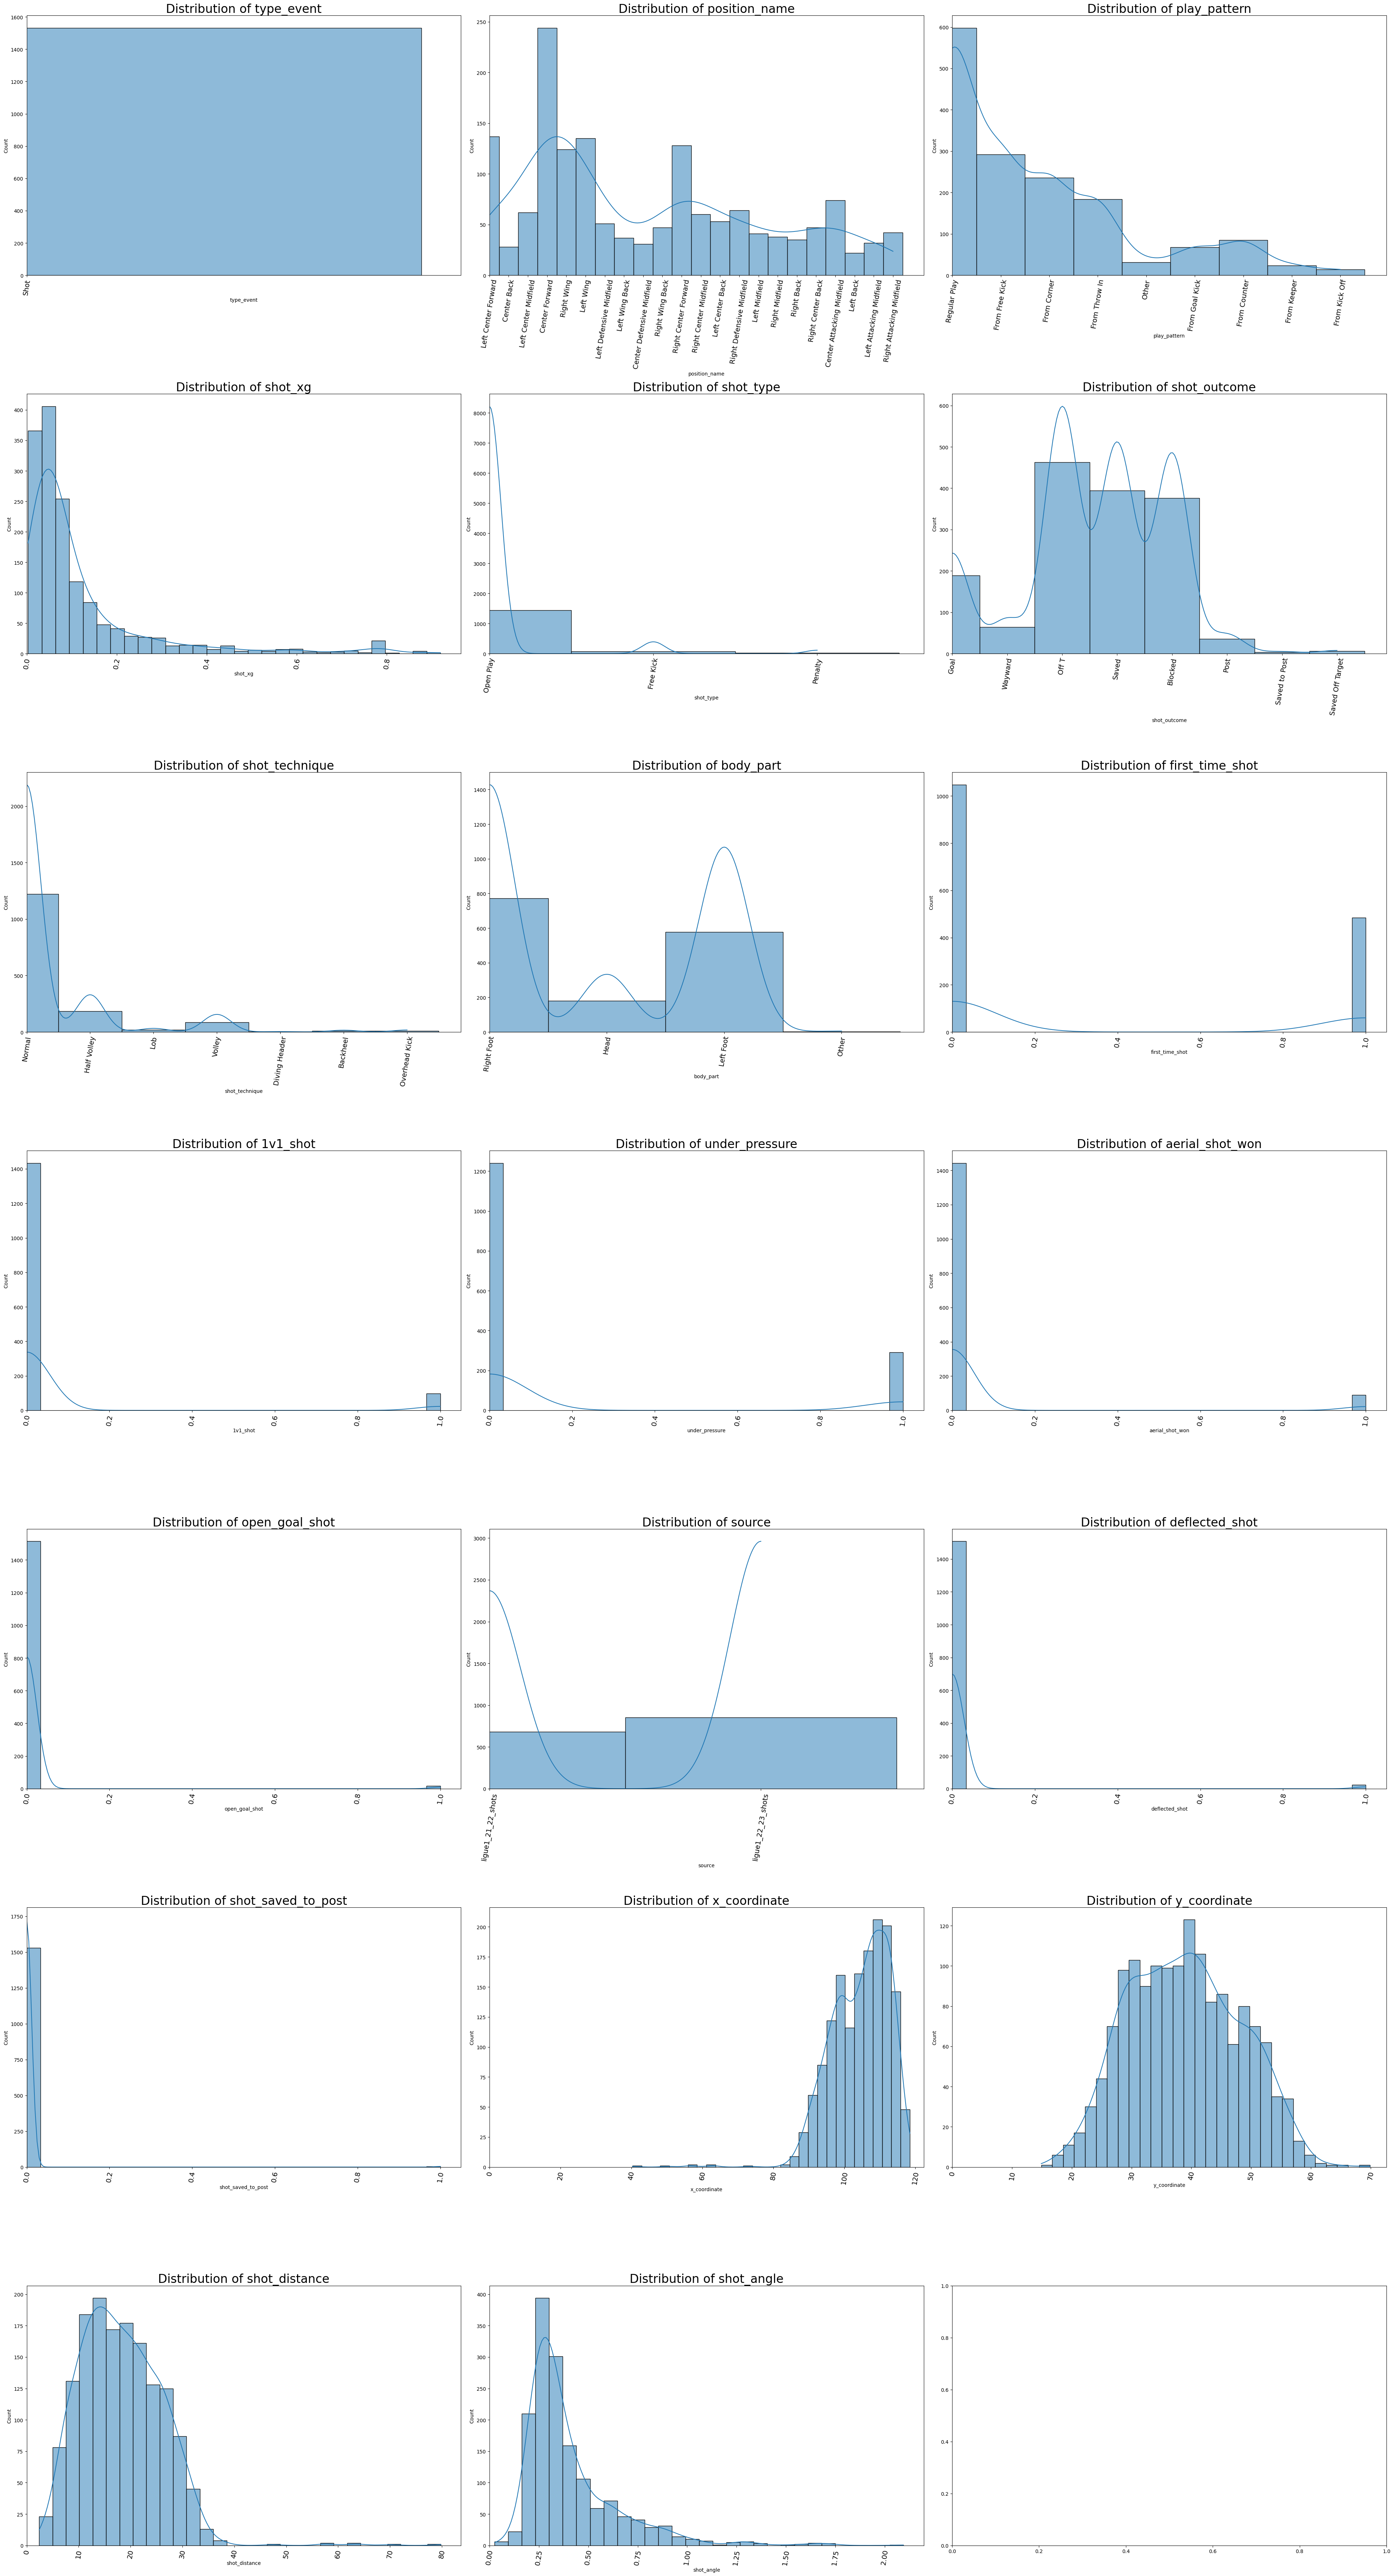

In [37]:
# 1. Histogram: Feature Distributions
features = ['type_event','position_name','play_pattern','shot_xg','shot_type','shot_outcome','shot_technique','body_part',
            'first_time_shot','1v1_shot','under_pressure','aerial_shot_won','open_goal_shot','source',
            'deflected_shot','shot_saved_to_post','x_coordinate','y_coordinate','shot_distance','shot_angle']

fig, axes = plt.subplots(nrows=7, ncols=3, figsize=(39, 72))
axes = axes.flatten()

for i, feature in enumerate(features):
    sns.histplot(df_xg_processed[feature], bins=30, kde=True, ax=axes[i])
    axes[i].set_xlim(0)
    axes[i].set_ylim(0)
    axes[i].set_title(f'Distribution of {feature}', fontsize=24)
    axes[i].set_xlabel(feature)
    #axes[i].set_ylabel('Frequency')
    axes[i].tick_params(axis='x', rotation=81, labelsize=14)  # Add this line
plt.tight_layout()
plt.show()

*   Most shots are between 0-40 relative distance to a 120x80 pitch (using statsbomb pitch scale reference)
    *   Shot  distance graph is right skewed
*   Most shots have an angle between between 0 (0 degrees) and 1 radians (approximately 57 degrees)
    *   SHot angle graph is right skewed
*   Most data points in shots xG are between 0 and 0.4/0.5; 

*   To note: higher xg values (approaching 1.0)
    *   will have shorter distances
    *   approach the center point of the goal, or approach an angle of 1.571 radians (approximately) or 90 degrees 
    *   ![Alt text](../images/eg_shot_angle.jpeg)

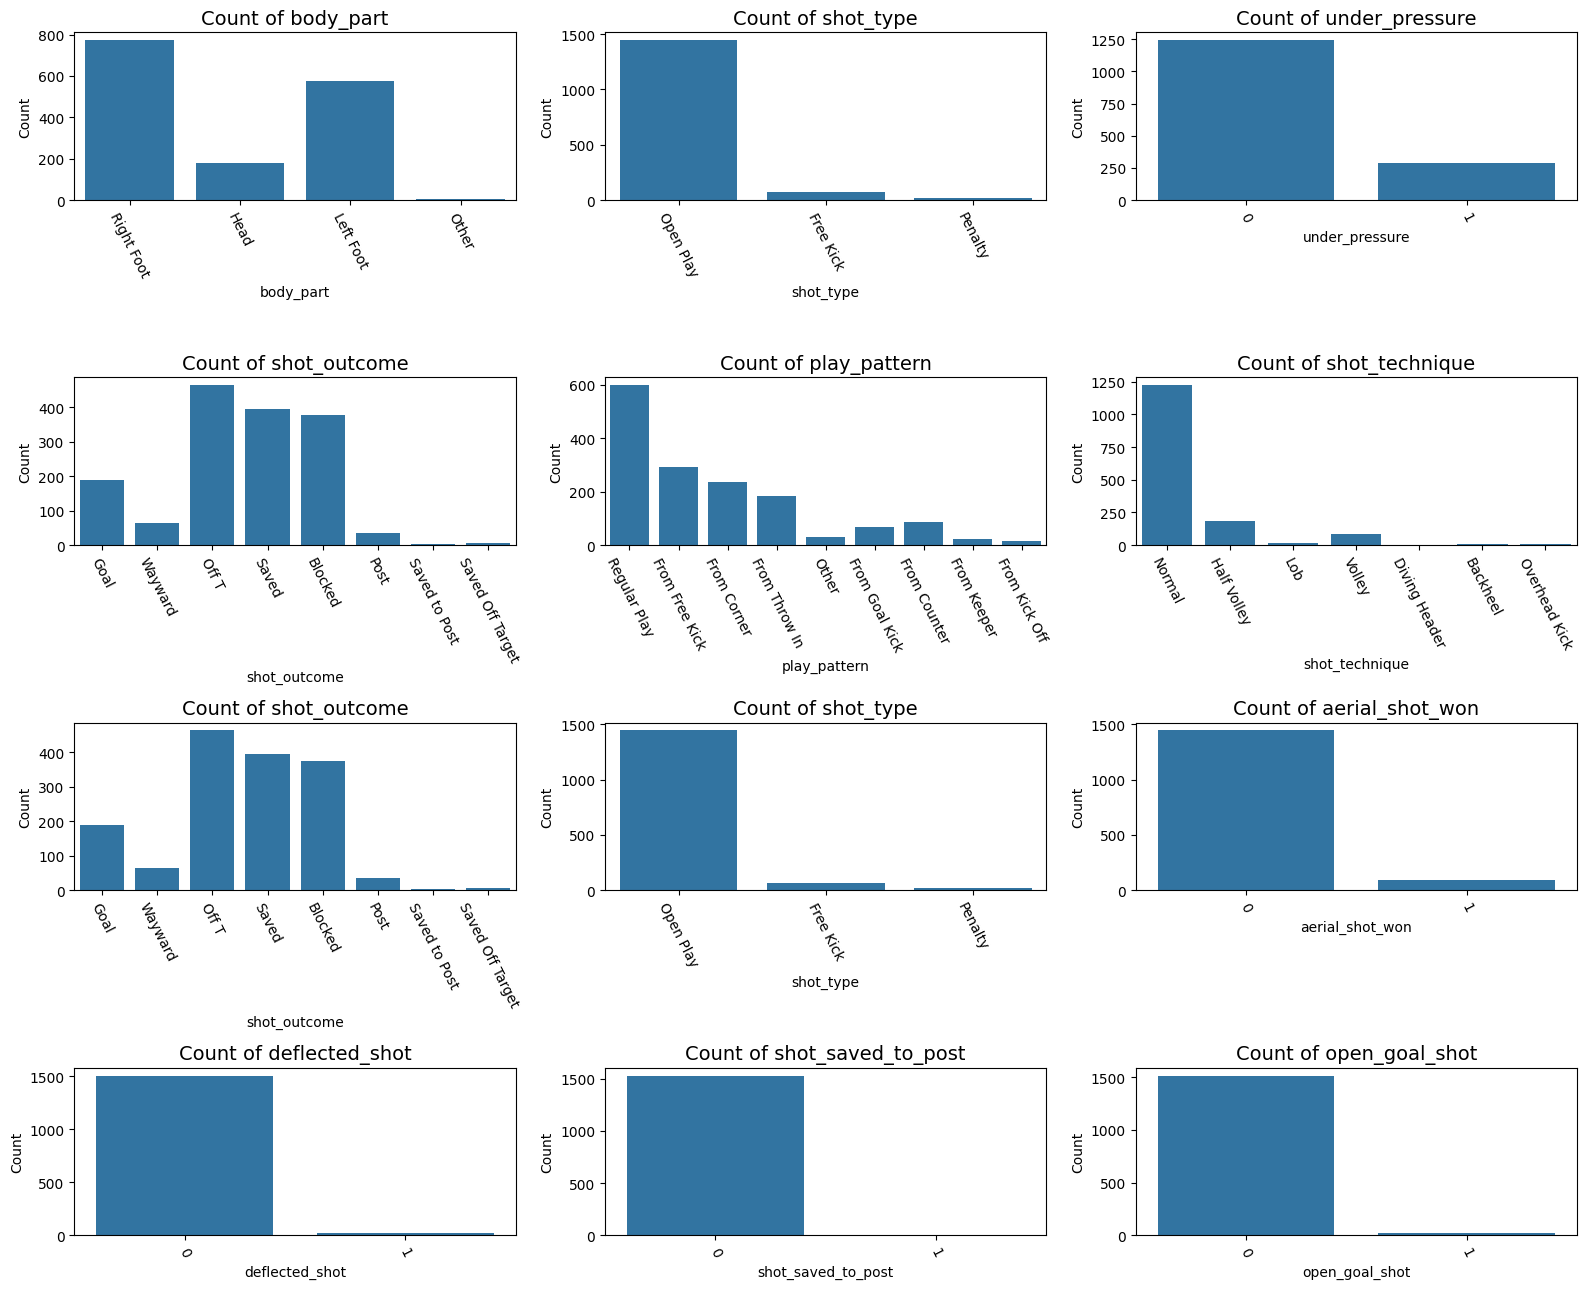

In [38]:
#2. Bar Chart: Categorical Features
categorical_features = ['body_part', 'shot_type', 'under_pressure','shot_outcome','play_pattern', 'shot_technique',
                        'shot_outcome','shot_type','aerial_shot_won', 'deflected_shot','shot_saved_to_post','open_goal_shot']
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(16, 13))
axes = axes.flatten()
for i, feature in enumerate(categorical_features):
    sns.countplot(data=df_xg_processed, x=feature, ax=axes[i])
    axes[i].set_title(f'Count of {feature}', fontsize = 14)
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Count')
    axes[i].tick_params(axis='x', rotation=-63)

plt.tight_layout()
plt.show()

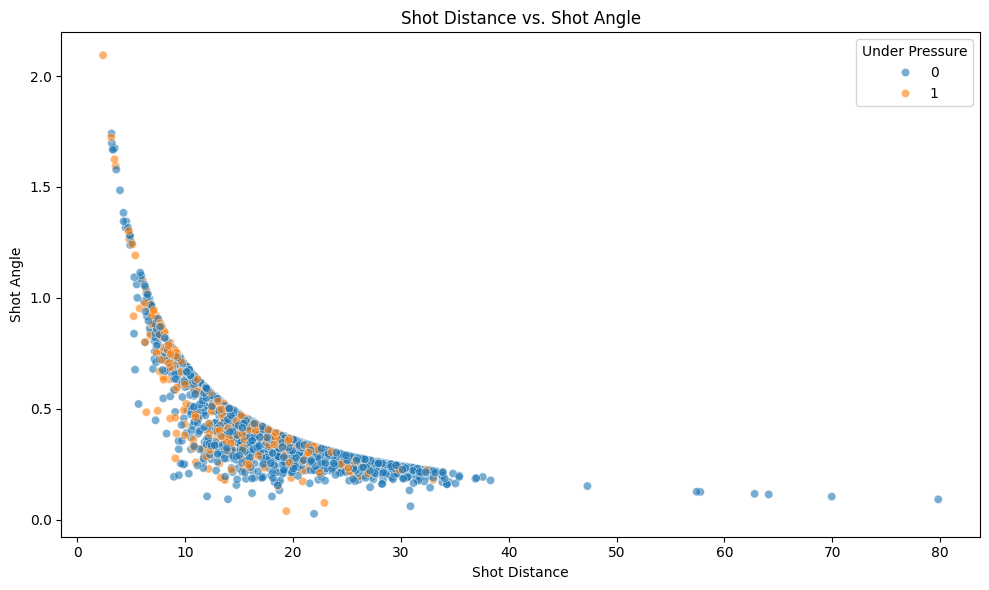

In [39]:
#3. Scatter Plot: Shot Distance vs. Shot Angle
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_xg_processed, x='shot_distance', y='shot_angle', hue='under_pressure', alpha=0.6)
plt.title('Shot Distance vs. Shot Angle')
plt.xlabel('Shot Distance')
plt.ylabel('Shot Angle')
plt.legend(title='Under Pressure')
plt.tight_layout()

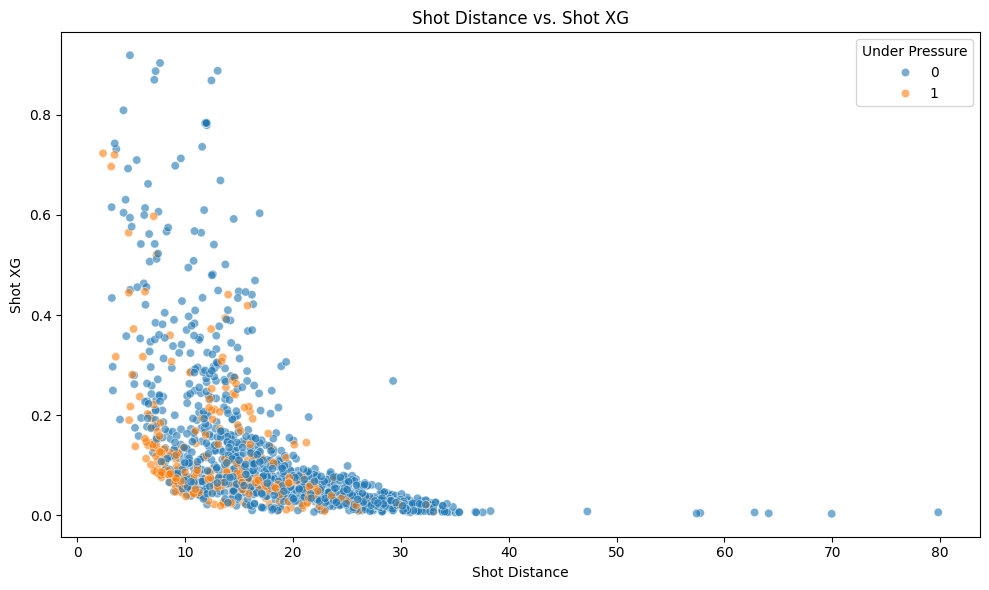

In [40]:
#4. Scatter Plot: Shot Distance vs. Shot XG
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_xg_processed, x='shot_distance', y='shot_xg', hue='under_pressure', alpha=0.6)
plt.title('Shot Distance vs. Shot XG')
plt.xlabel('Shot Distance')
plt.ylabel('Shot XG')
plt.legend(title='Under Pressure')
plt.tight_layout()

In [41]:
sys.path.append("C:/Users/On3B3/OneDrive/Documents/Programming_Projects/xG_Model/src")
#import user-defined Class for shot calculations
from helperFunctions import draw_pitch

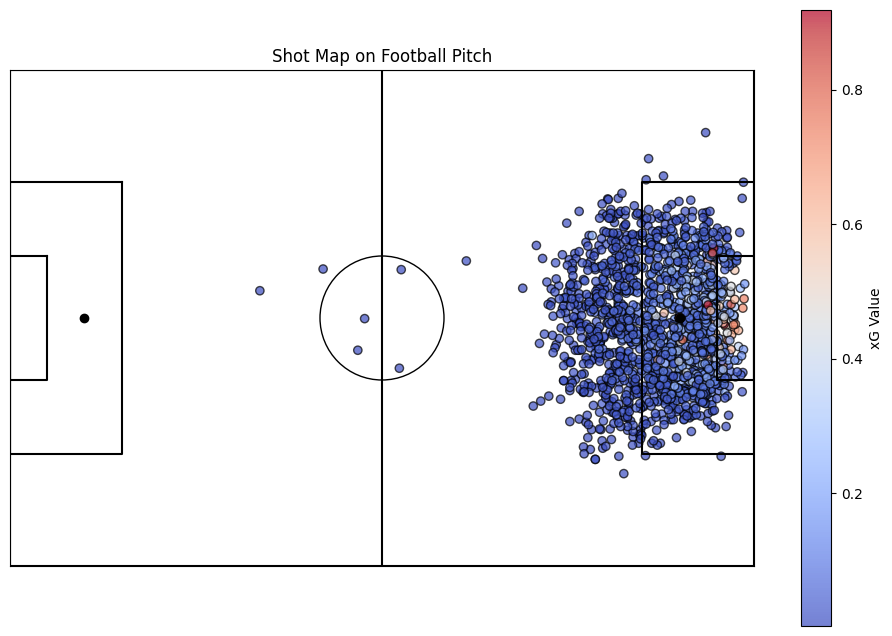

In [42]:
#5. Shot Map on Football Pitch (Scatter Plot of 'x' and 'y')
fig, ax = plt.subplots(figsize=(12, 8))
ax = draw_pitch(ax)

# Plot shots colored by xG
sc = ax.scatter(df_xg_processed['x_coordinate'], df_xg_processed['y_coordinate'], c=df_xg_processed['shot_xg'], cmap='coolwarm', alpha=0.7, edgecolors='k')

plt.colorbar(sc, label='xG Value')
plt.title('Shot Map on Football Pitch')
plt.show()

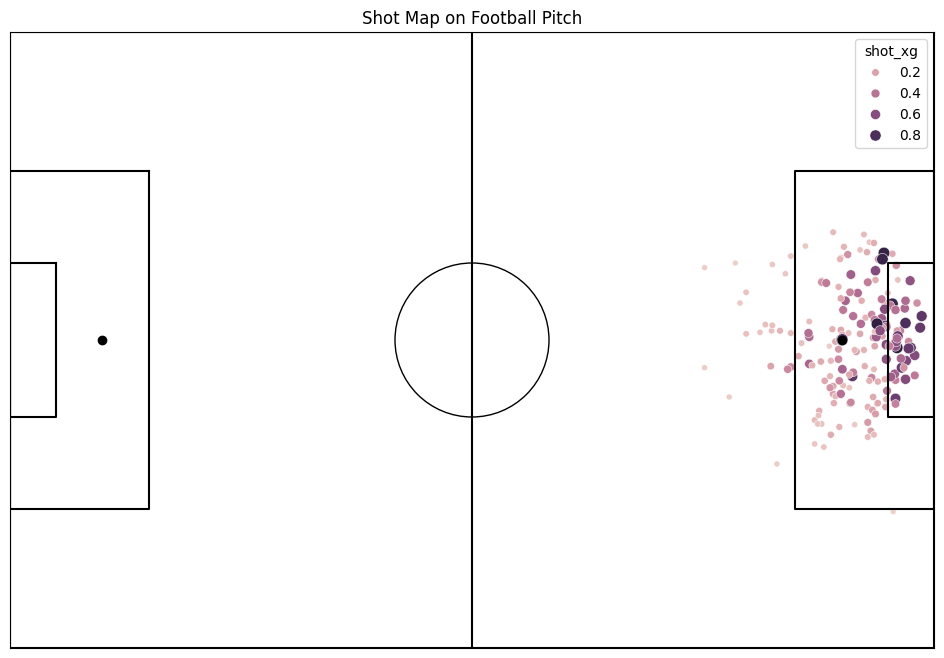

In [43]:
#6. Shot Map on Football Pitch for Shot Outcome = goal (Scatter Plot of 'x' and 'y')

#filter dataframe
condition= df_xg_processed['shot_outcome'] == 'Goal'
shots_goals= df_xg_processed[condition]

fig, ax = plt.subplots(figsize=(12, 8))
ax = draw_pitch(ax)

# Plot shots colored by xG
sc = sns.scatterplot(data = shots_goals, x= 'x_coordinate',y='y_coordinate', hue= 'shot_xg',size='shot_xg')

#plt.colorbar(sc, label='Shot Outcome')
plt.title('Shot Map on Football Pitch')
plt.show()

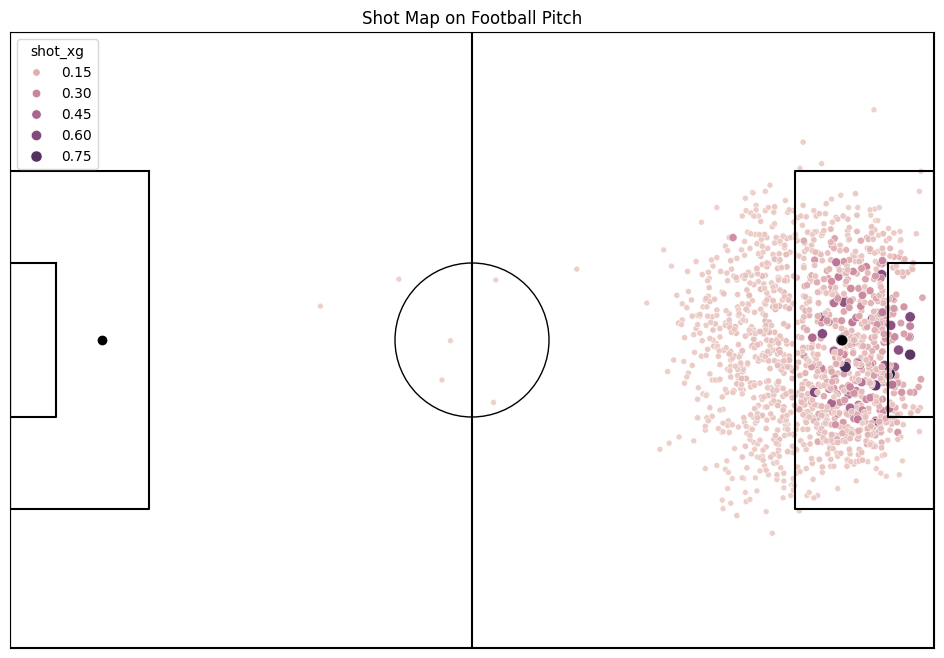

In [44]:
#7. Shot Map on Football Pitch for Shot Outcome != goal (Scatter Plot of 'x' and 'y')

#filter dataframe
#condition= df_xg_processed['shot_outcome'] != 'Goal'
shots_missed= df_xg_processed[df_xg_processed['shot_outcome'] != 'Goal']

fig, ax = plt.subplots(figsize=(12, 8))
ax = draw_pitch(ax)

# Plot shots colored by xG
sc = sns.scatterplot(data = shots_missed, x= 'x_coordinate',y='y_coordinate', hue= 'shot_xg',size='shot_xg')

#plt.colorbar(sc, label='Shot Outcome')
plt.title('Shot Map on Football Pitch')
plt.show()

xG speaks to the quality of a shot and not whether a shot is a goal or not. However the presumption and what the data shows is that higher quality shot (high xG) is more likely to result in a goal. 

From these shot maps, most goals are scored within the 6 yard box.
Incidentaly, these shots have the highest xG.
Even in the case of shots which did not result in a goal, those with the highest xG can be seen within the 6 yard box and also within the 18 yard box circling around the penaly spot

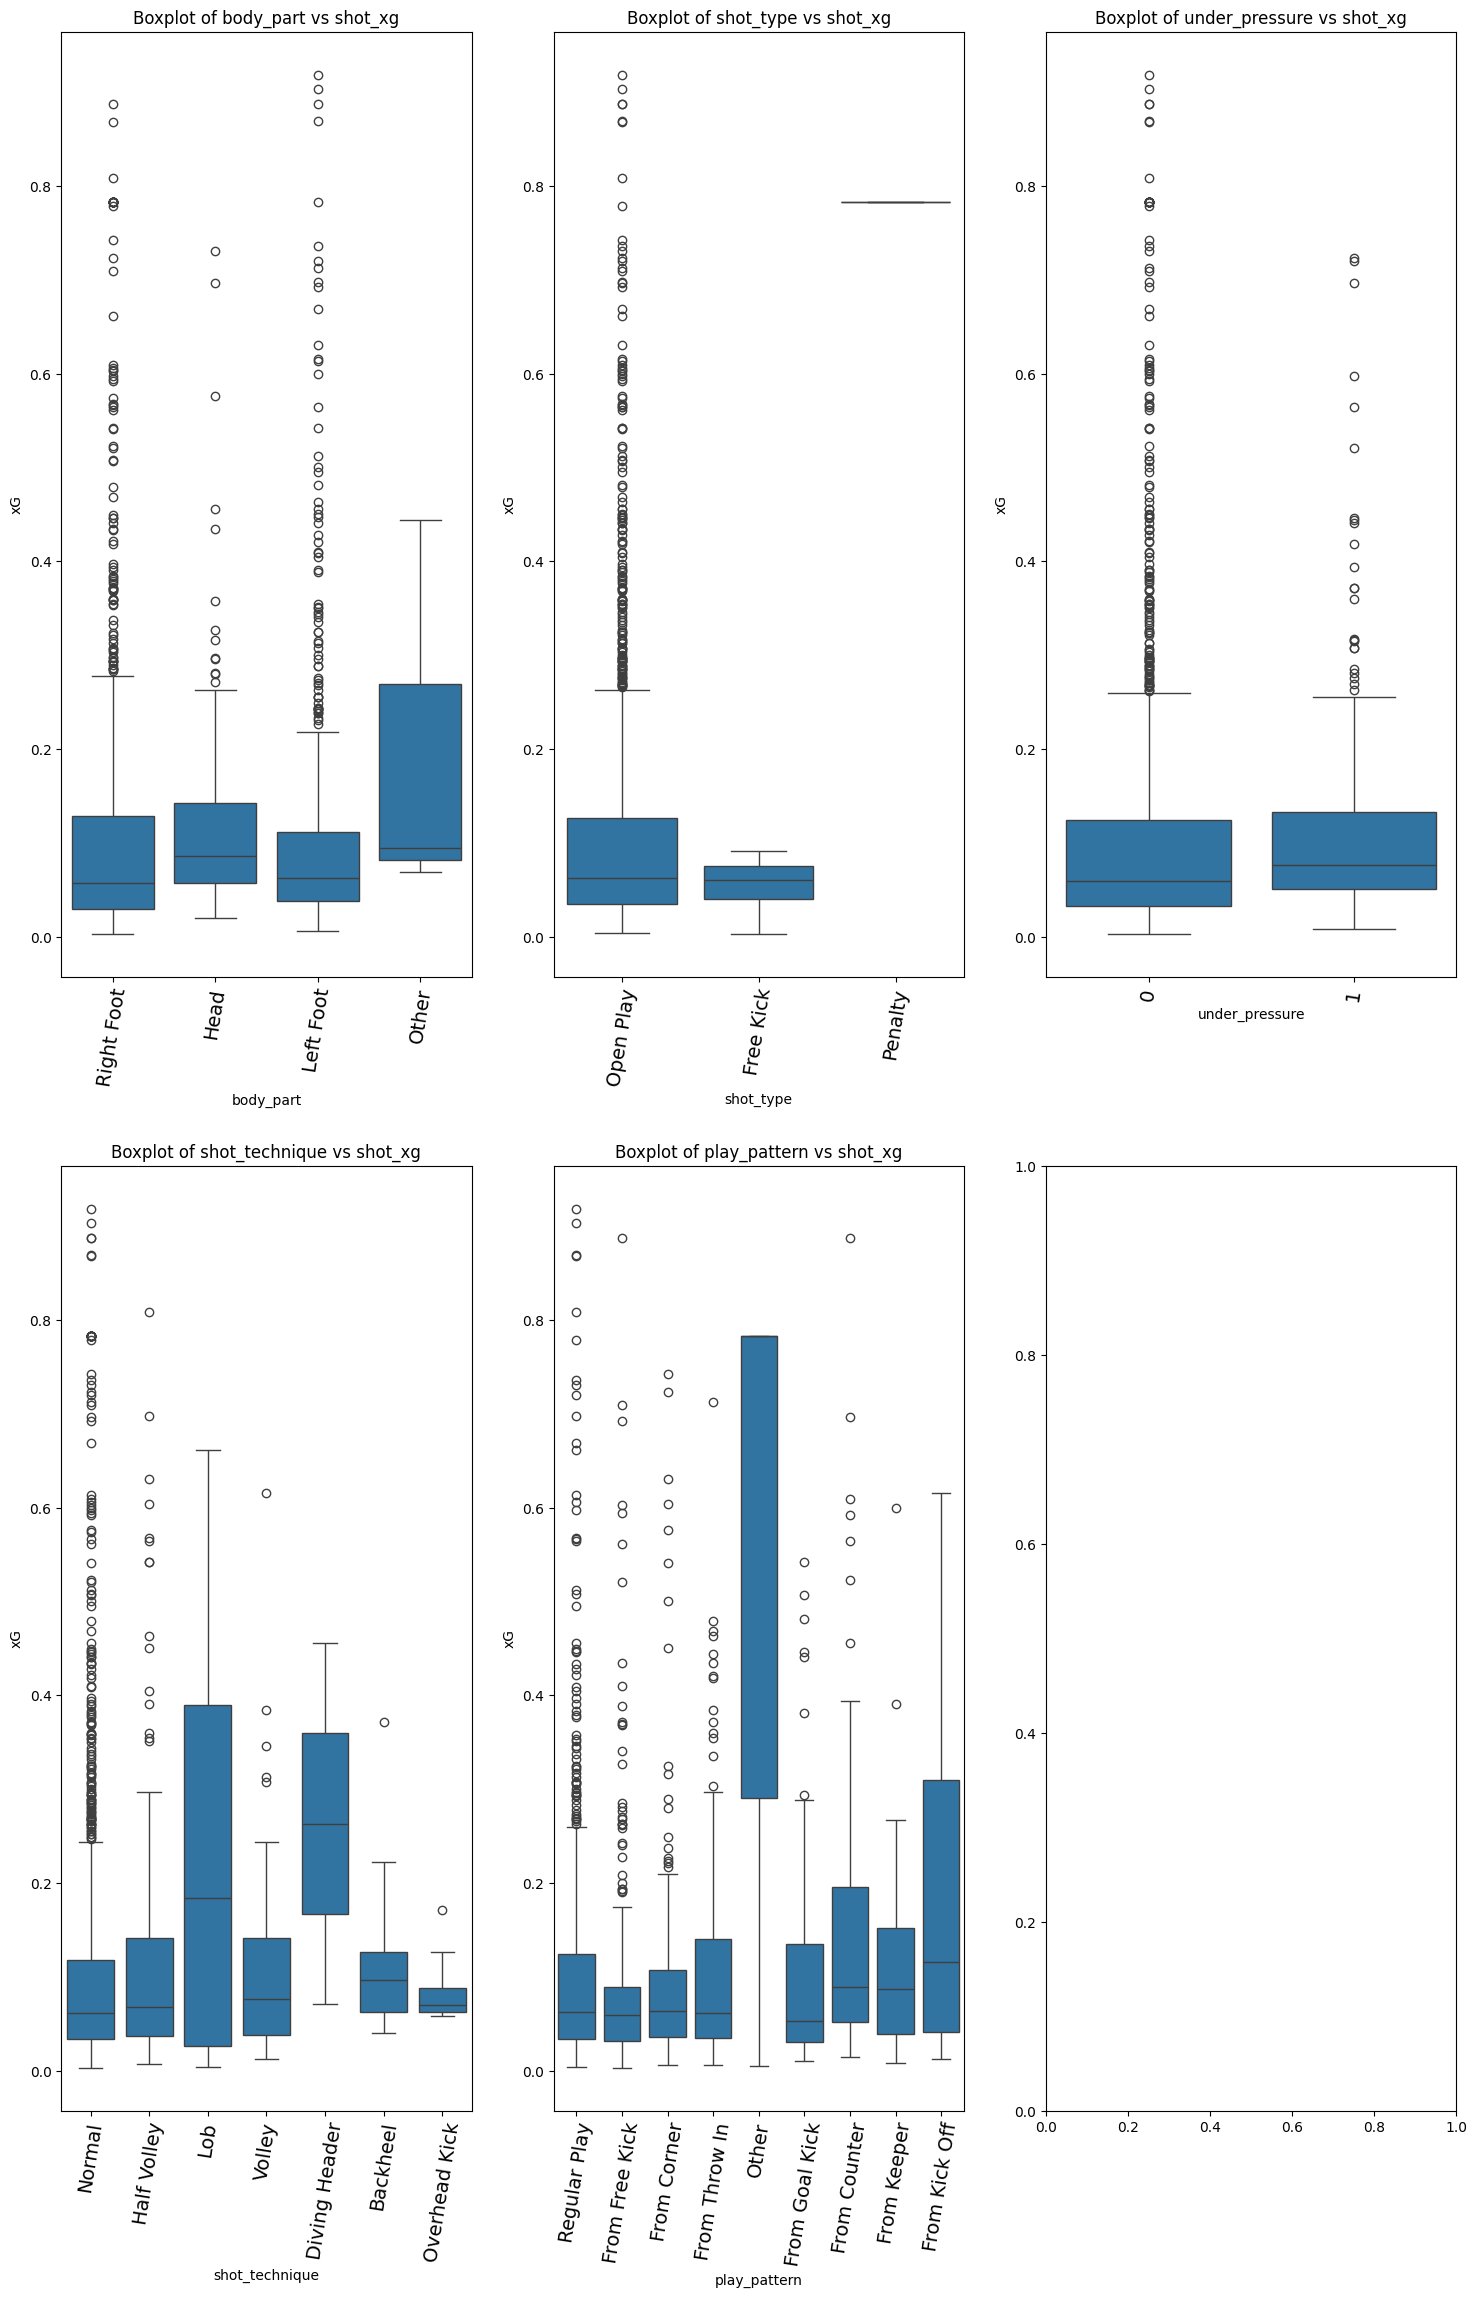

In [45]:
#8. Boxplot: Feature vs. Shot XG
features = [ 'body_part', 'shot_type', 'under_pressure','shot_technique','play_pattern']

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 27))
axes = axes.flatten()
for i, feature in enumerate(features):
    sns.boxplot(x=df_xg_processed[feature],y=df_xg_processed['shot_xg'],data=df_xg_processed, ax=axes[i])
    axes[i].set_title(f'Boxplot of {feature} vs shot_xg')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('xG')
    axes[i].tick_params(axis='x', rotation=81, labelsize=14)

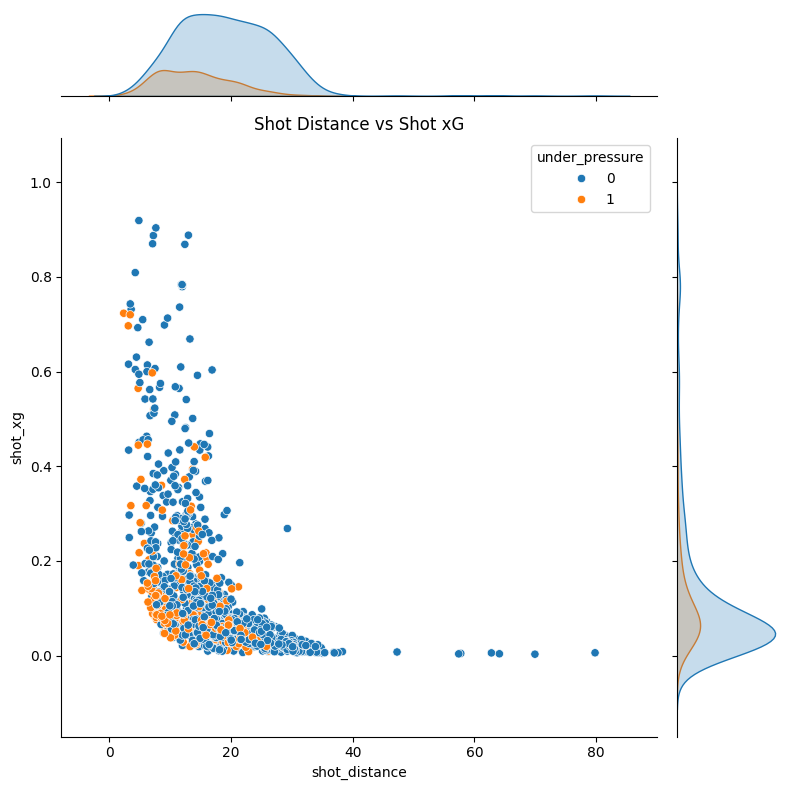

In [46]:
#9. Joint Plot: Shot Distance vs. Shot XG
sns.jointplot(data=df_xg_processed, x='shot_distance', y='shot_xg', kind='scatter', hue='under_pressure', height=8)
plt.title("Shot Distance vs Shot xG")
plt.tight_layout()
plt.show()

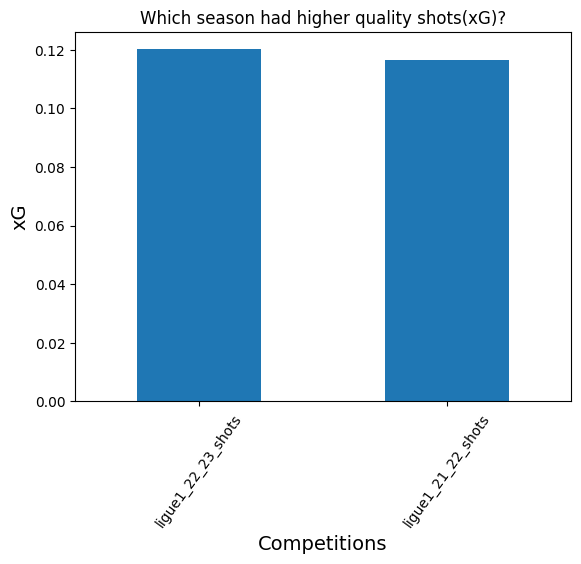

In [47]:
#Which season had higher quality shots?
rank_xg= df_xg_processed.groupby('source')['shot_xg'].mean().sort_values(ascending=False)

#sns.barplot(rank_xg, x='source')
rank_xg.plot.bar(rot =54)
plt.title('Which season had higher quality shots(xG)?')
plt.ylabel('xG', fontsize=14)
plt.xlabel('Competitions', fontsize=14)
plt.show()

In [48]:
#Which play pattern resulted in higher quality shots [in general]?
mean_xg_per_play = df_xg_processed.groupby('play_pattern')['shot_xg'].mean().sort_values(ascending=False)
mean_xg_per_play

play_pattern
Other             0.573601
From Kick Off     0.182409
From Counter      0.158688
From Keeper       0.126009
Regular Play      0.113516
From Goal Kick    0.113187
From Throw In     0.106728
From Corner       0.094706
From Free Kick    0.092585
Name: shot_xg, dtype: float64

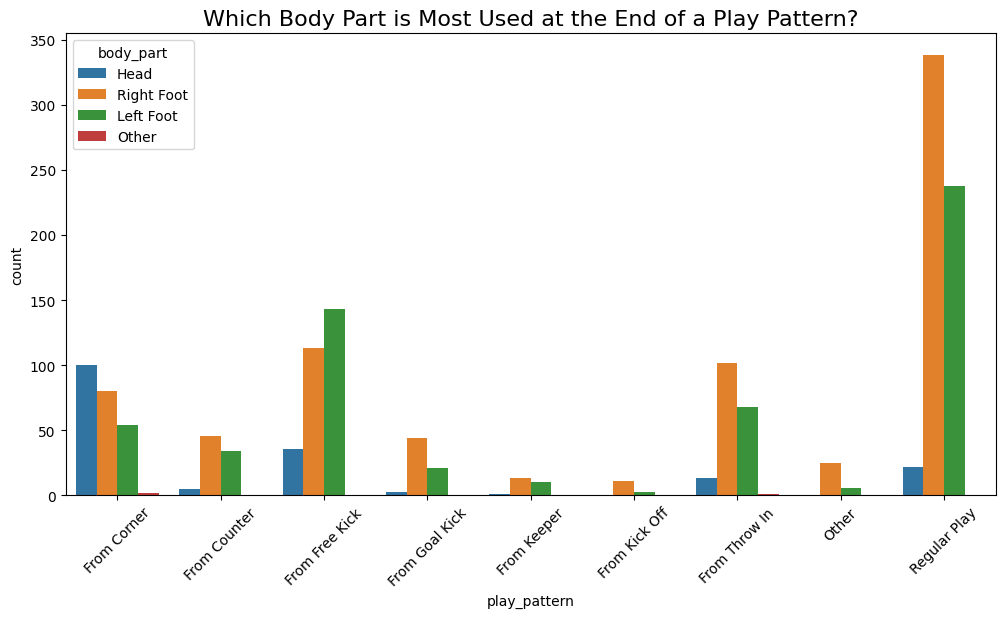

In [49]:
#Which body part is mostly used at the end of a play pattern?
popular_body_part= df_xg_processed.groupby('play_pattern')['body_part'].value_counts().reset_index(name='count')

popular_body_part
#popular_body_part.to_frame()

#popular_body_part.plot.bar()
plt.figure(figsize=(12,6))
ax= sns.barplot(data=popular_body_part,x='play_pattern', y='count' , hue='body_part')
ax.tick_params(axis='x', labelrotation=45)
plt.title('Which Body Part is Most Used at the End of a Play Pattern?', fontsize= 16)
#plt.xlabel(rot=30)
plt.show()


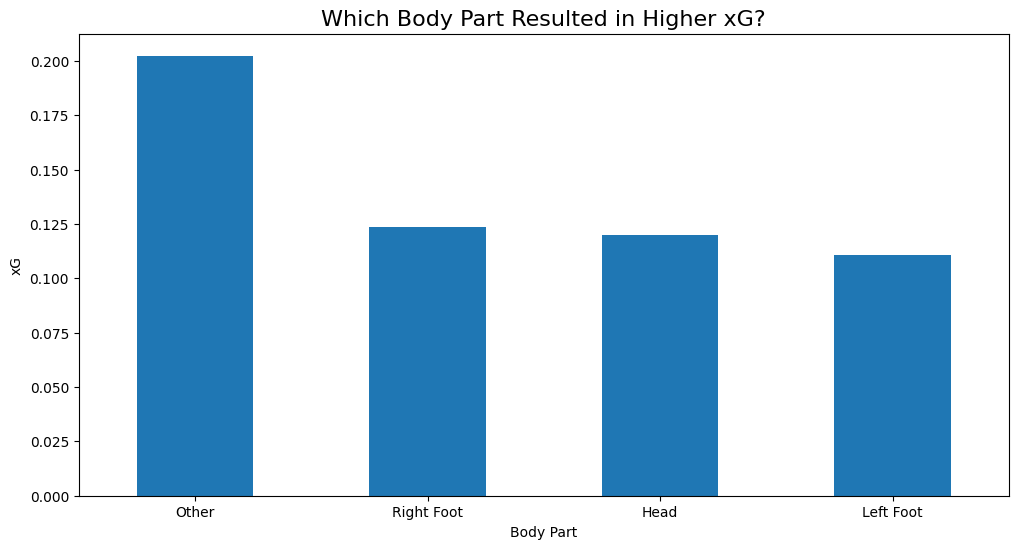

In [50]:
body_part_xg=df_xg_processed.groupby('body_part')['shot_xg'].mean().sort_values(ascending=False)

#Which body part resulted in higher xg?
plt.figure(figsize=(12,6))
body_part_xg.plot.bar(rot=0)
#tick_params(axis='x', labelrotation=45)
plt.title('Which Body Part Resulted in Higher xG?', fontsize= 16)
plt.ylabel('xG')
plt.xlabel('Body Part')
plt.show()

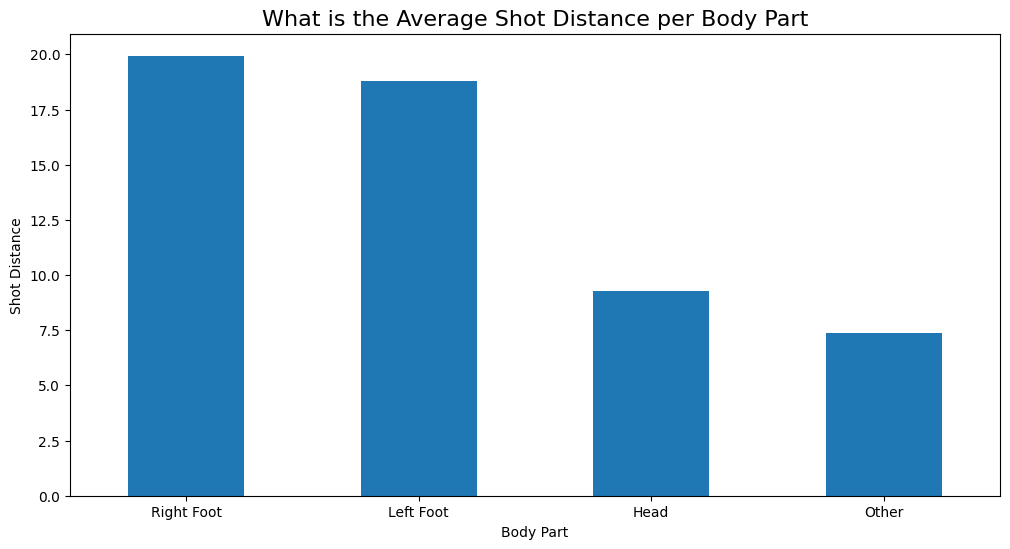

In [51]:
#For a shot from each body part, what is the average distance ?

body_part_avg_distance=df_xg_processed.groupby('body_part')['shot_distance'].mean().sort_values(ascending=False)

#Barplot
plt.figure(figsize=(12,6))
body_part_avg_distance.plot.bar(rot=0)
plt.title('What is the Average Shot Distance per Body Part', fontsize= 16)
plt.ylabel('Shot Distance')
plt.xlabel('Body Part')
plt.show()


In [52]:
#Average shot xG for play patterns is highest with other; significantly higher but there is not much literature to give any clearer parameters on what this covers. 
#To get a better understanding on what other could entail, 
#What is the avg xG for play patterns and corresponding body part?

df_xg_processed.groupby(['play_pattern','body_part'])['shot_xg'].mean().reset_index()


,play_pattern,body_part,shot_xg
0,From Corner,Head,0.104758
1,From Corner,Left Foot,0.091610
2,From Corner,Other,0.081351
3,From Corner,Right Foot,0.084565
4,From Counter,Head,0.287034
5,From Counter,Left Foot,0.131242
6,From Counter,Right Foot,0.165023
7,From Free Kick,Head,0.110146
8,From Free Kick,Left Foot,0.081279
9,From Free Kick,Right Foot,0.101298


In [53]:
df_xg_processed.groupby(['player_name', 'position_name'])['shot_xg'].mean().sort_values(ascending=False)

player_name                        position_name            
Duje Ćaleta-Car                    Left Center Back             0.723100
Mehdi Zeffane                      Right Wing Back              0.719972
Grejohn Kyei                       Center Forward               0.614003
Ante Palaversa                     Right Defensive Midfield     0.576583
Corentin Jean                      Right Wing Back              0.566653
Cheikh Ahmadou Bamba Mbacke Dieng  Center Forward               0.526949
Kalifa Coulibaly                   Center Forward               0.499757
Islam Slimani                      Center Forward               0.475262
Alexandre Lacazette                Right Center Forward         0.434118
Kevin Gameiro                      Center Attacking Midfield    0.420485
Enzo Le Fée                        Left Attacking Midfield      0.409112
Sada Thioub                        Right Wing Back              0.404489
Florian Tardieu                    Left Defensive Midfield     

In [54]:
df_xg_processed['team_name'].value_counts()           


team_name
Paris Saint-Germain    878
Marseille               57
Lille                   53
Nantes                  44
Rennes                  43
Lorient                 42
OGC Nice                40
Lens                    40
Stade de Reims          35
Lyon                    34
Strasbourg              31
Clermont Foot           29
Troyes                  26
Toulouse                26
Auxerre                 24
Montpellier             23
Angers                  22
Saint-Étienne           21
AS Monaco               17
Bordeaux                15
AC Ajaccio              15
Stade Brestois          13
Metz                     4
Name: count, dtype: int64

In [55]:
#players to consider for finishing profile

cherki = df_xg_processed[df_xg_processed['player_name'] =='Mathis Rayan Cherki'] #only two 
print(f'\nCherki number of shot events:{cherki.shape[0]}')
jonathan = df_xg_processed[df_xg_processed['player_name']== 'Jonathan David']
print(f'\nJonathan number of shot events:{jonathan.shape[0]}')
hugo = df_xg_processed[df_xg_processed['player_name']== 'Hugo Ekitike']
print(f'\nHugo number of shot events:{hugo.shape[0]}')
elye_wahi = df_xg_processed[df_xg_processed['player_name']=='Sepe Elye Wahi']
print(f'\nElye Wahi number of shot events:{elye_wahi.shape[0]}') 
kalimuendo = df_xg_processed[df_xg_processed['player_name']=='Arnaud Kalimuendo Muinga']
print(f'\nKalimuendo number of shot events:{kalimuendo.shape[0]}')
gouiri = df_xg_processed[df_xg_processed['player_name']=='Amine Gouiri']
print(f'\nGouiri number of shot events:{gouiri.shape[0]}')
mbappe = df_xg_processed[df_xg_processed['player_name']=='Kylian Mbappé Lottin']
print(f'\nMbappe number of shot events:{mbappe.shape[0]}')
messi = df_xg_processed[df_xg_processed['player_name'] =='Lionel Andrés Messi Cuccittini']
print(f'\nMessi number of shot events:{messi.shape[0]}')
neymar = df_xg_processed[df_xg_processed['player_name'] =='Neymar da Silva Santos Junior']
print(f'\nNeymar number of shot events:{neymar.shape[0]}')


Cherki number of shot events:2

Jonathan number of shot events:14

Hugo number of shot events:21

Elye Wahi number of shot events:1

Kalimuendo number of shot events:7

Gouiri number of shot events:5

Mbappe number of shot events:222

Messi number of shot events:218

Neymar number of shot events:76


In [56]:
goal_events=df_xg_processed[df_xg_processed['shot_outcome']=='Goal']
len(goal_events)
goal_events.groupby(['team_name','player_name'])['shot_outcome'].count()

team_name            player_name                      
AS Monaco            Kevin Volland                         1
Angers               Sada Thioub                           1
Auxerre              Lassine Sinayoko                      1
Clermont Foot        Grejohn Kyei                          1
                     Jodel Dossou                          1
                     Johan Gastien                         1
                     Mehdi Zeffane                         1
Lens                 Corentin Jean                         1
                     Przemysław Frankowski                 1
                     Seko Fofana                           1
Lille                Bafodé Diakité                        1
                     Jonathan Bamba                        2
                     Jonathan David                        2
                     Sven Botman                           1
Lorient              Cheikh Ahmadou Bamba Mbacke Dieng     1
                     Darlin Zi

Statsbomb dataset Limitation
1.  Does not have the complete Ligue 1 fixture; data for every match not provided
2.  Looking at the goals over two seasons Mbape has 49( in actuality he scored 57)
3.  The numbers are significantly lower for other less notable players


Player finishing profile
1. Considering data limitation will focus on Mbappe

In [57]:
#Questions 
#1. Which is his dominant striking foot?
#2. Is player finishing quality good striking with both feet
#3. What sequence of play results in player's best xG/goal?
#4. Is player a composed finisher?
#a.  How is player shooting quality when not under pressure?
#b. How is player shooting quality when under pressure?
#5. 

### Mbappe

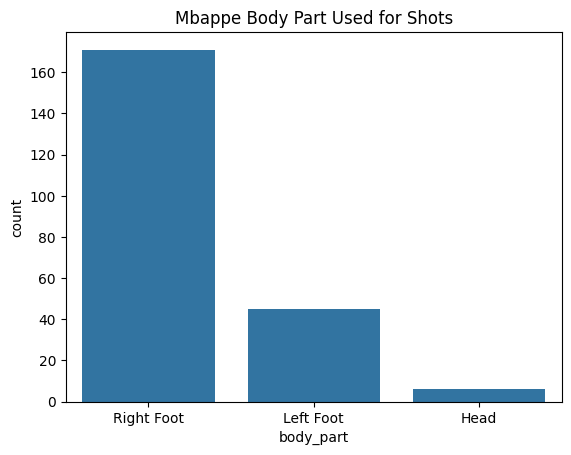

In [58]:
#1. Which is his dominant striking foot?
mbappe.groupby('body_part').size()

sns.countplot(data=mbappe, x='body_part')
plt.title('Mbappe Body Part Used for Shots')
plt.show()

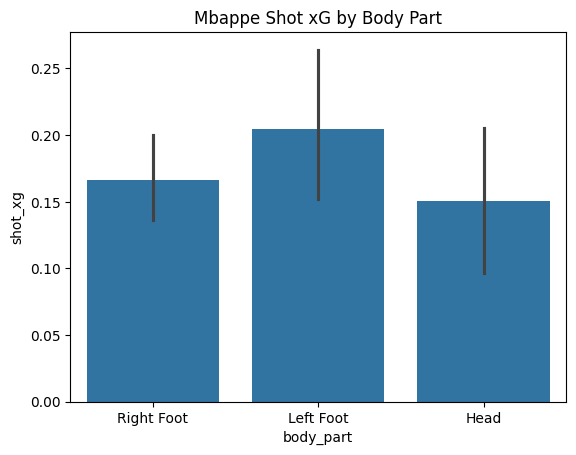

In [59]:
#2. Is player finishing quality good striking with both feet
mbappe.groupby('body_part')['shot_xg'].mean()
sns.barplot(data=mbappe, x='body_part', y='shot_xg')
plt.title('Mbappe Shot xG by Body Part')
plt.show()

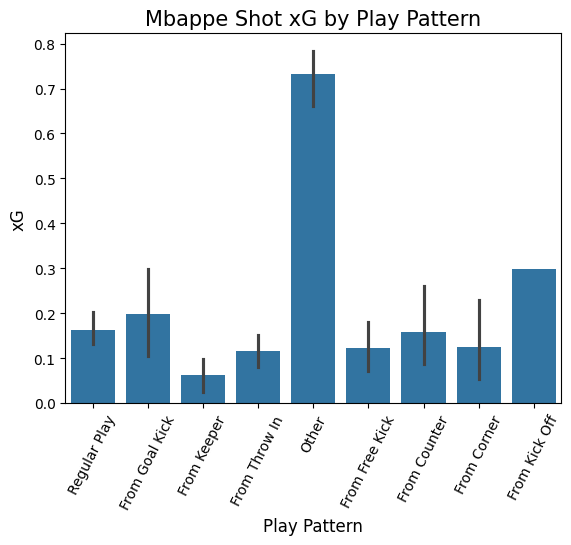

In [60]:
#3. What sequence of play results in player's best xG/goal?
mbappe.groupby('play_pattern')['shot_xg'].max().sort_values(ascending=False)
sns.barplot(data=mbappe, x='play_pattern', y='shot_xg')
plt.title('Mbappe Shot xG by Play Pattern',fontsize=15)
plt.ylabel('xG',fontsize=12)
plt.xlabel('Play Pattern',fontsize=12)
plt.xticks(rotation=63)
plt.show()

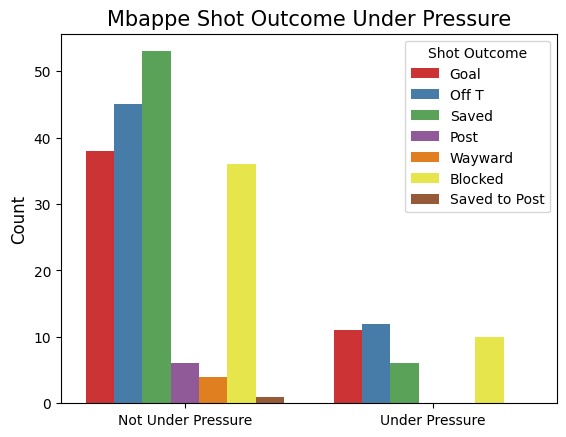

In [61]:
#4. Is player a composed finisher?
mbappe.groupby('under_pressure')['shot_outcome'].value_counts()#.sort_values(ascending=False)
sns.countplot(data=mbappe, x='under_pressure', hue='shot_outcome', palette= "Set1")
plt.xticks([0, 1], ['Not Under Pressure', 'Under Pressure'])
plt.xlabel("")
plt.title('Mbappe Shot Outcome Under Pressure', fontsize=15)
plt.ylabel('Count', fontsize=12)
plt.legend(title='Shot Outcome')
plt.show()  


In [62]:
#a.  How is player shooting quality when not under pressure vs under pressure?
#under_pressure= mbappe[mbappe['under_pressure'] == 1]
print(mbappe.groupby('under_pressure')['shot_xg'].mean())

print(f'\nCount of shots taken under pressure or not: \n{mbappe["under_pressure"].value_counts()}')

under_pressure
0    0.180594
1    0.140268
Name: shot_xg, dtype: float64

Count of shots taken under pressure or not: 
under_pressure
0    183
1     39
Name: count, dtype: int64


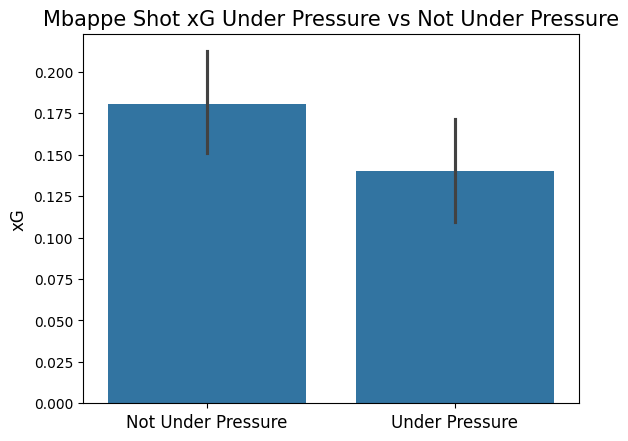

In [63]:
sns.barplot(data=mbappe, x='under_pressure', y='shot_xg')
plt.title('Mbappe Shot xG Under Pressure vs Not Under Pressure', fontsize=15)
plt.ylabel('xG', fontsize=12)
plt.xlabel("")
plt.xticks([0, 1], ['Not Under Pressure', 'Under Pressure'], fontsize=12)
plt.show()

In [64]:
#Player shotmap
sys.path.append("C:/Users/On3B3/OneDrive/Documents/Programming_Projects/xG_Model/src")
from helperFunctions import draw_pitch

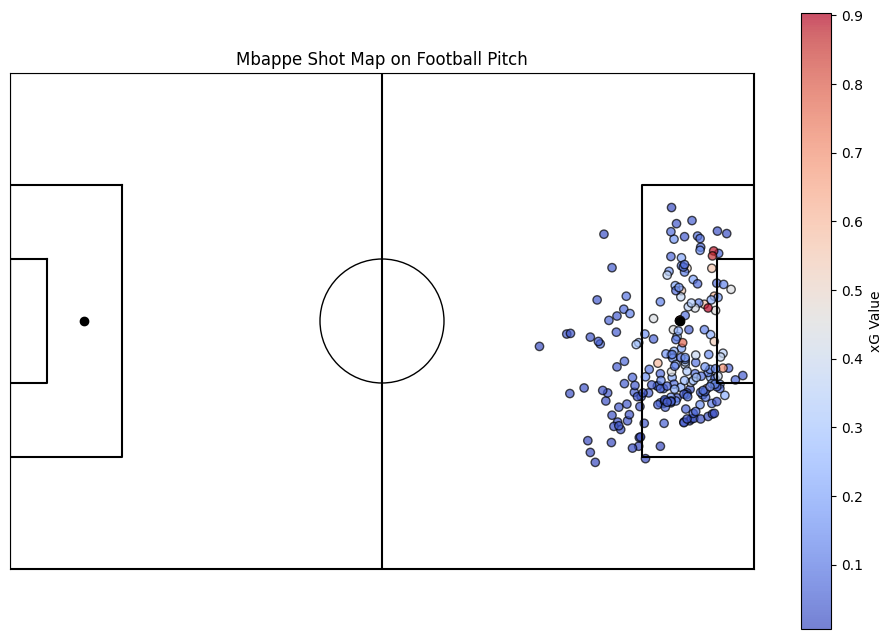

In [65]:
#5. Shot Map on Football Pitch (Scatter Plot of 'x' and 'y')
fig, ax = plt.subplots(figsize=(12, 8))
ax = draw_pitch(ax)

# Plot shots colored by xG
sc = ax.scatter(mbappe['x_coordinate'], mbappe['y_coordinate'], c=mbappe['shot_xg'], cmap='coolwarm', alpha=0.7, edgecolors='k')

plt.colorbar(sc, label='xG Value')
plt.title('Mbappe Shot Map on Football Pitch')
plt.show()

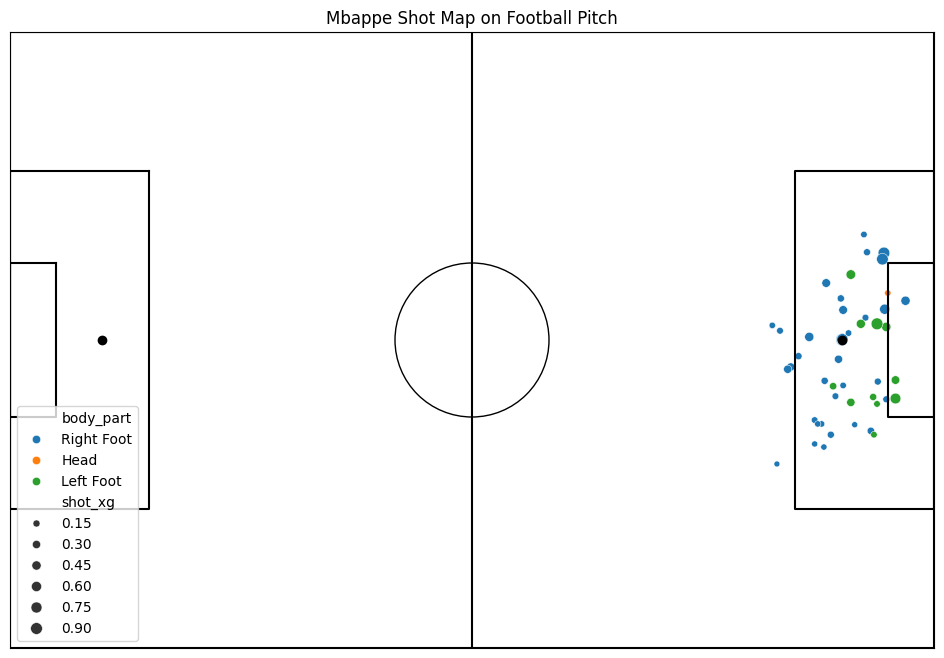

In [66]:
#Shot Map on Football Pitch for Shot Outcome = goal (Scatter Plot of 'x' and 'y')

#filter dataframe
shots_goals= mbappe[mbappe['shot_outcome'] == 'Goal']

fig, ax = plt.subplots(figsize=(12, 8))
ax = draw_pitch(ax)

# Plot shots colored by xG
sc = sns.scatterplot(data = shots_goals, x= 'x_coordinate',y='y_coordinate', hue= 'body_part',size='shot_xg')

#plt.colorbar(sc, label='Shot Outcome')
plt.title('Mbappe Shot Map on Football Pitch')
plt.show()

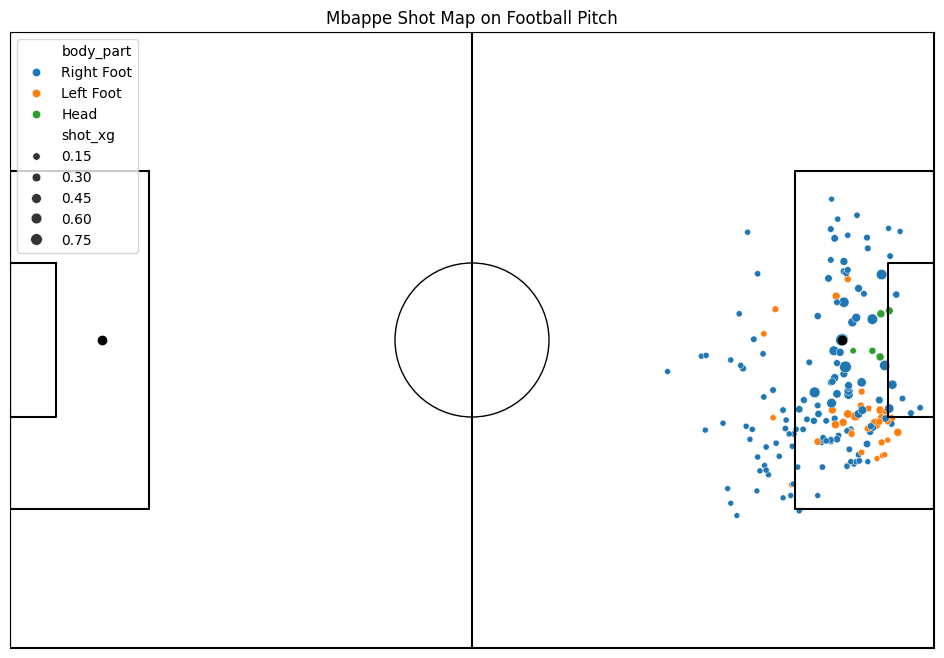

In [67]:
#6. Player Shot Map on Football Pitch for Shot Outcome != goal (Scatter Plot of 'x' and 'y')

#filter dataframe
shots_missed= mbappe[mbappe['shot_outcome'] != 'Goal']

fig, ax = plt.subplots(figsize=(12, 8))
ax = draw_pitch(ax)

# Plot shots colored by xG
sc = sns.scatterplot(data = shots_missed, x= 'x_coordinate',y='y_coordinate', hue= 'body_part',size='shot_xg')

#plt.colorbar(sc, label='Shot Outcome')
plt.title('Mbappe Shot Map on Football Pitch')
plt.show()

C:\Users\On3B3\AppData\Local\Temp\ipykernel_18628\3781294129.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(labels=['Other', '1v1'])


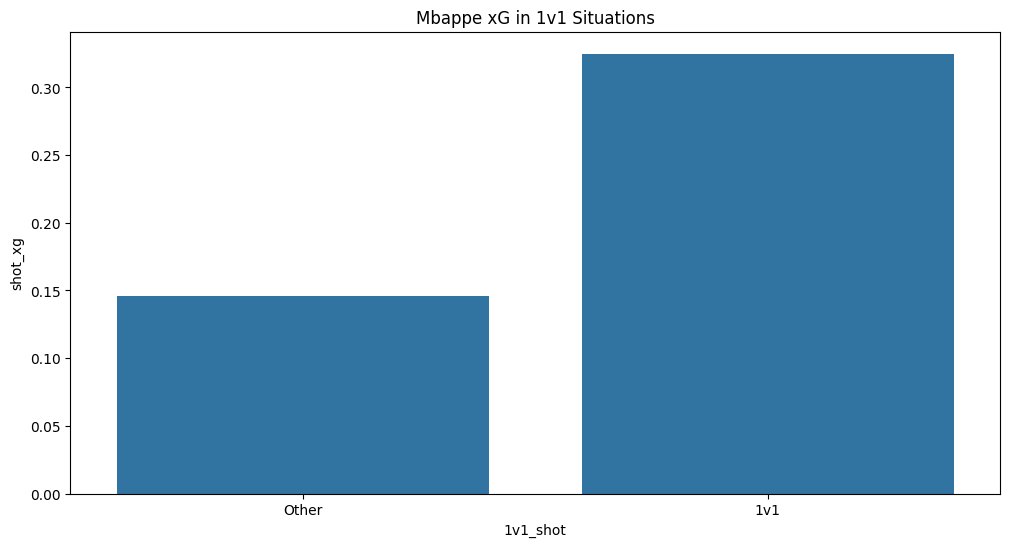

In [130]:
# How likely player is to score in 1v1 situations?
plt.figure(figsize=(12,6))
ax=plt.gca()
sns.barplot(data=mbappe.groupby('1v1_shot')['shot_xg'].mean())
plt.title("Mbappe xG in 1v1 Situations")
ax.set_xticklabels(labels=['Other', '1v1'])
plt.show()



In [134]:
avg_distance_shot_outcome_mb=mbappe.groupby('shot_outcome').agg({'shot_distance':['mean'],'shot_xg':['mean']}).sort_values(by=('shot_xg','mean'),ascending=False)
mbappe.groupby('shot_outcome').agg({'shot_distance':['mean'],'shot_xg':['mean']}).sort_values(by=('shot_xg','mean'),ascending=False).round(3)

#avg_distance_shot_outcome.unstack(level=0).plot(kind='bar')

,shot_distance,shot_xg
,mean,mean
shot_outcome,,
Saved to Post,12.000,0.784
Goal,13.804,0.317
Wayward,12.920,0.214
Post,17.182,0.192
Off T,17.593,0.156
Saved,18.519,0.142
Blocked,18.020,0.063


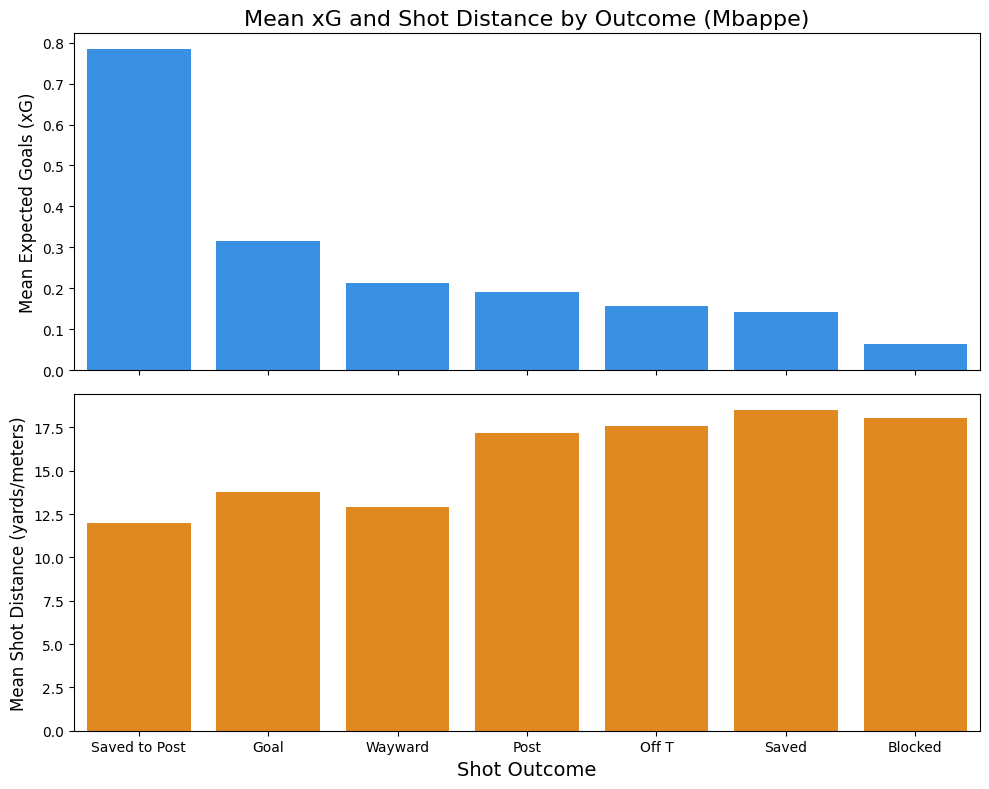

In [135]:
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(10, 8), sharex=True)


sns.barplot(
    x=avg_distance_shot_outcome_mb.index, 
    y=avg_distance_shot_outcome_mb[('shot_xg', 'mean')],  
    ax=ax1, 
    color='dodgerblue'
)
ax1.set_ylabel('Mean Expected Goals (xG)', fontsize=12)
ax1.set_title('Mean xG and Shot Distance by Outcome (Mbappe)', fontsize=16)
ax1.set_xlabel('')  


sns.barplot(
    x=avg_distance_shot_outcome_mb.index, 
    y=avg_distance_shot_outcome_mb[('shot_distance', 'mean')],  
    ax=ax2, 
    color='darkorange'
)
ax2.set_ylabel('Mean Shot Distance (yards/meters)', fontsize=12)
ax2.set_xlabel('Shot Outcome', fontsize=14)


plt.xticks(rotation=0) 
plt.tight_layout() 
plt.show()

In [137]:
#Number of shots taken per field postion
count_shots_position_mb=mbappe.groupby('position_name').agg({'position_name':['size'],'shot_xg':['mean']}).sort_values(by=('position_name','size'),ascending=False)
mbappe.groupby('position_name').agg({'position_name':['size'],'shot_xg':['mean']}).sort_values(by=('position_name','size'),ascending=False)

,position_name,shot_xg
,size,mean
position_name,,
Center Forward,95,0.167673
Left Center Forward,75,0.183639
Left Wing,39,0.173564
Left Attacking Midfield,6,0.155689
Right Center Forward,6,0.178842
Center Attacking Midfield,1,0.041221


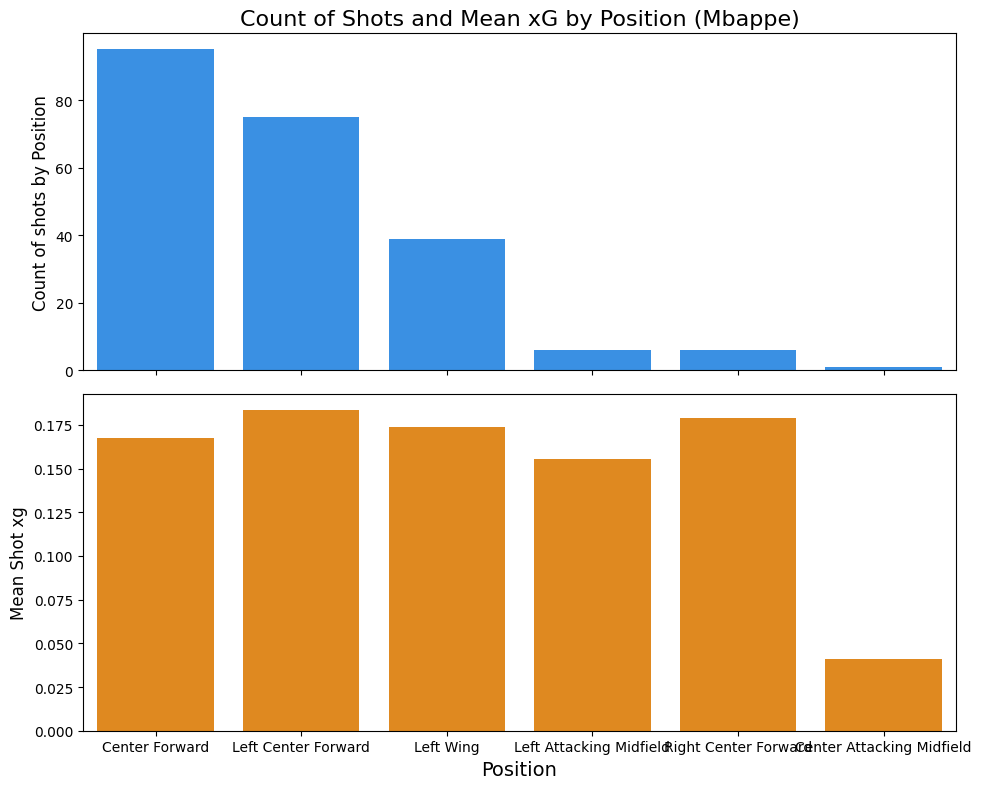

In [138]:
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(10, 8), sharex=True)


sns.barplot(
    x=count_shots_position_mb.index, 
    y=count_shots_position_mb[('position_name', 'size')],  
    ax=ax1, 
    color='dodgerblue'
)
ax1.set_ylabel('Count of shots by Position', fontsize=12)
ax1.set_title('Count of Shots and Mean xG by Position (Mbappe)', fontsize=16)
ax1.set_xlabel('')  


sns.barplot(
    x=count_shots_position_mb.index, 
    y=count_shots_position_mb[('shot_xg', 'mean')],  
    ax=ax2, 
    color='darkorange'
)
ax2.set_ylabel('Mean Shot xg', fontsize=12)
ax2.set_xlabel('Position', fontsize=14)


plt.xticks(rotation=0) 
plt.tight_layout() 
plt.show()

In [139]:
#Which position did player score the most goals from?
goals_by_position_mb=mbappe.query("shot_outcome=='Goal'").groupby(['position_name'])['shot_outcome'].count().sort_values(ascending=False)
mbappe.query("shot_outcome=='Goal'").groupby(['position_name'])['shot_outcome'].count().sort_values(ascending=False)

position_name
Center Forward             22
Left Center Forward        14
Left Wing                  10
Left Attacking Midfield     2
Right Center Forward        1
Name: shot_outcome, dtype: int64

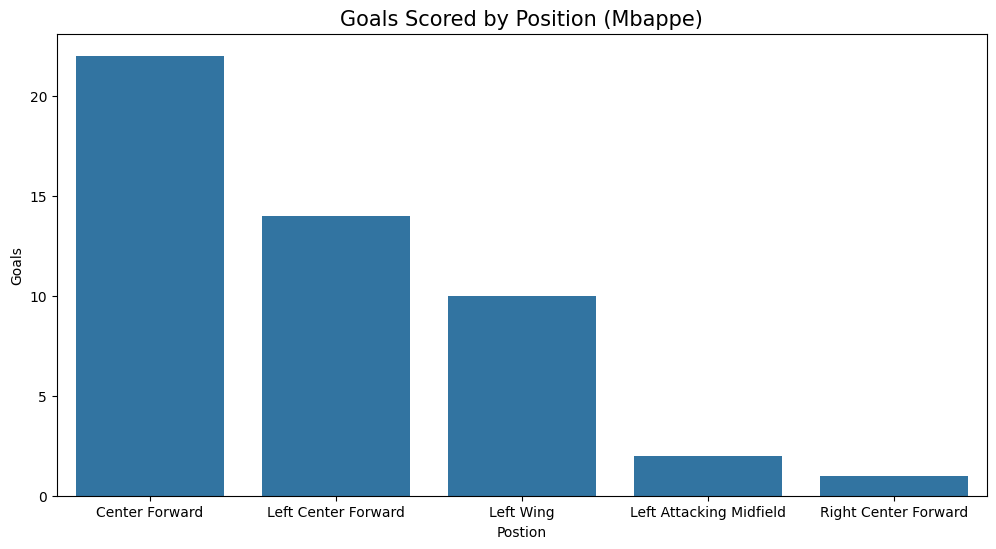

In [140]:
plt.figure(figsize=(12,6))
sns.barplot(goals_by_position_mb)
plt.title("Goals Scored by Position (Mbappe)",fontsize=15)
plt.ylabel('Goals')
plt.xlabel('Postion')
plt.show()

# MESSI

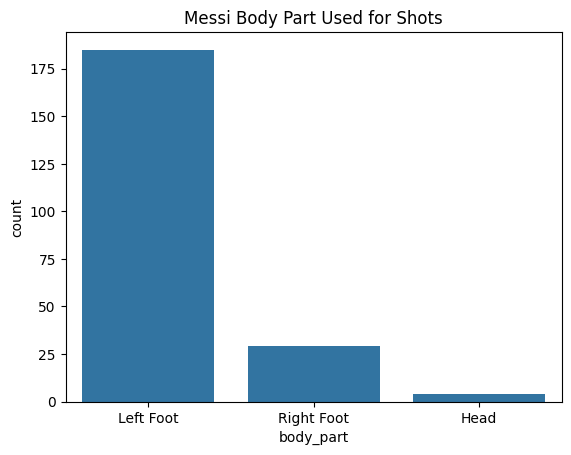

In [68]:
#1. Which is his dominant striking foot?
messi.groupby('body_part').size()

sns.countplot(data=messi, x='body_part')
plt.title('Messi Body Part Used for Shots')
plt.show()

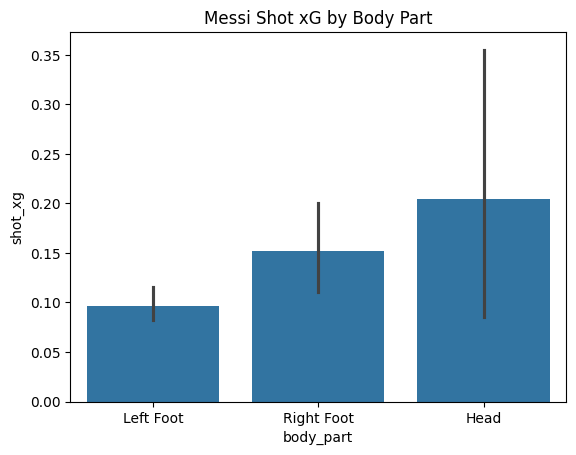

In [69]:
#2. Is player finishing quality good striking with both feet
messi.groupby('body_part')['shot_xg'].mean()
sns.barplot(data=messi, x='body_part', y='shot_xg')
plt.title('Messi Shot xG by Body Part')
plt.show()

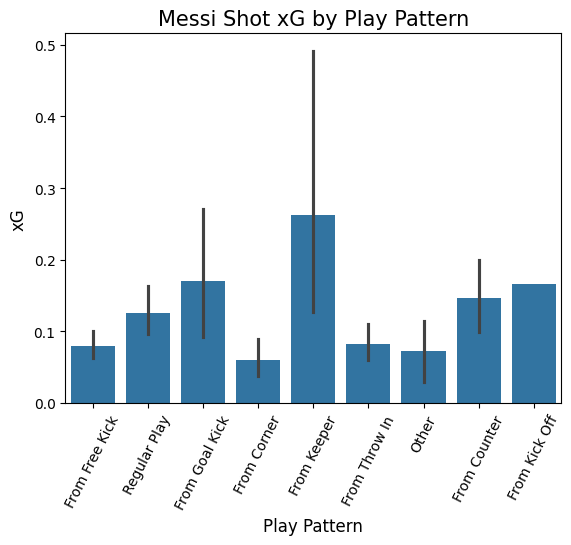

In [70]:
#3. What sequence of play results in player's best xG/goal?
messi.groupby('play_pattern')['shot_xg'].max().sort_values(ascending=False)
sns.barplot(data=messi, x='play_pattern', y='shot_xg')
plt.title('Messi Shot xG by Play Pattern',fontsize=15)
plt.ylabel('xG',fontsize=12)
plt.xlabel('Play Pattern',fontsize=12)
plt.xticks(rotation=63)
plt.show()

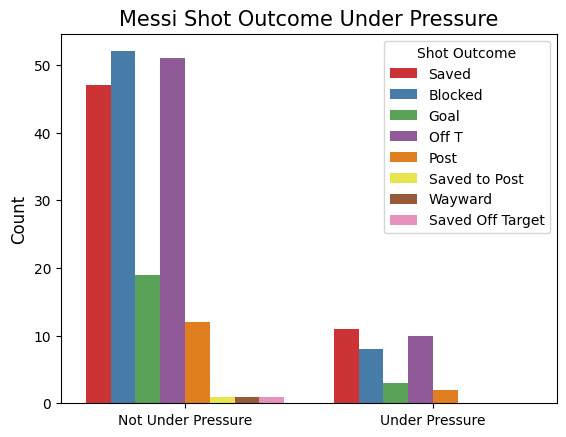

In [71]:
#4. Is player a composed finisher?
messi.groupby('under_pressure')['shot_outcome'].value_counts()#.sort_values(ascending=False)
sns.countplot(data=messi, x='under_pressure', hue='shot_outcome', palette= "Set1")
plt.xticks([0, 1], ['Not Under Pressure', 'Under Pressure'])
plt.xlabel("")
plt.title('Messi Shot Outcome Under Pressure', fontsize=15)
plt.ylabel('Count', fontsize=12)
plt.legend(title='Shot Outcome')
plt.show()  


In [72]:
#a.  How is player shooting quality when not under pressure vs under pressure?
#under_pressure= mbappe[mbappe['under_pressure'] == 1]
print(messi.groupby('under_pressure')['shot_xg'].mean())

print(f'\nCount of shots taken under pressure or not: \n{messi["under_pressure"].value_counts()}')

under_pressure
0    0.108256
1    0.094445
Name: shot_xg, dtype: float64

Count of shots taken under pressure or not: 
under_pressure
0    184
1     34
Name: count, dtype: int64


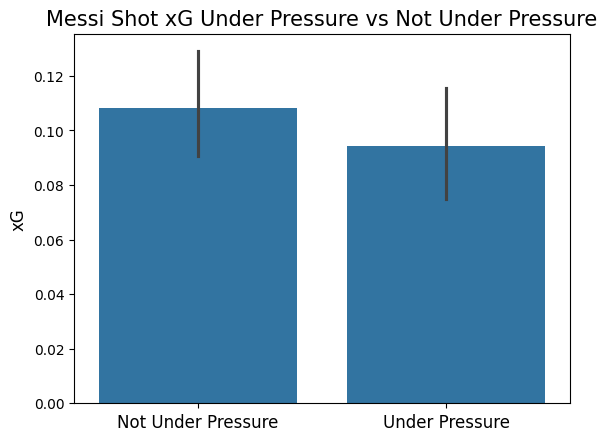

In [73]:
sns.barplot(data=messi, x='under_pressure', y='shot_xg')
plt.title('Messi Shot xG Under Pressure vs Not Under Pressure', fontsize=15)
plt.ylabel('xG', fontsize=12)
plt.xlabel("")
plt.xticks([0, 1], ['Not Under Pressure', 'Under Pressure'], fontsize=12)
plt.show()

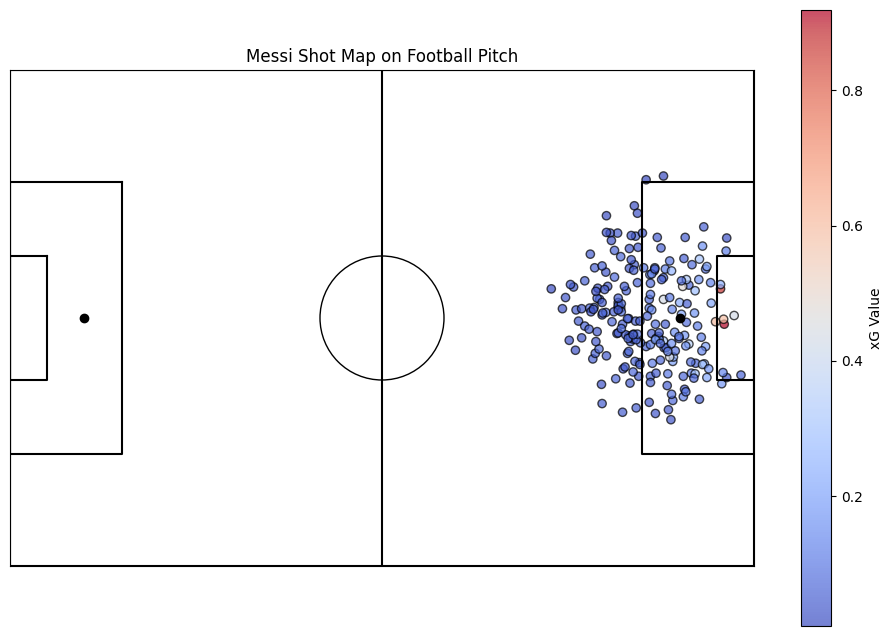

In [74]:
#5. Shot Map on Football Pitch (Scatter Plot of 'x' and 'y')
fig, ax = plt.subplots(figsize=(12, 8))
ax = draw_pitch(ax)

# Plot shots colored by xG
sc = ax.scatter(messi['x_coordinate'], messi['y_coordinate'], c=messi['shot_xg'], cmap='coolwarm', alpha=0.7, edgecolors='k')

plt.colorbar(sc, label='xG Value')
plt.title('Messi Shot Map on Football Pitch')
plt.show()

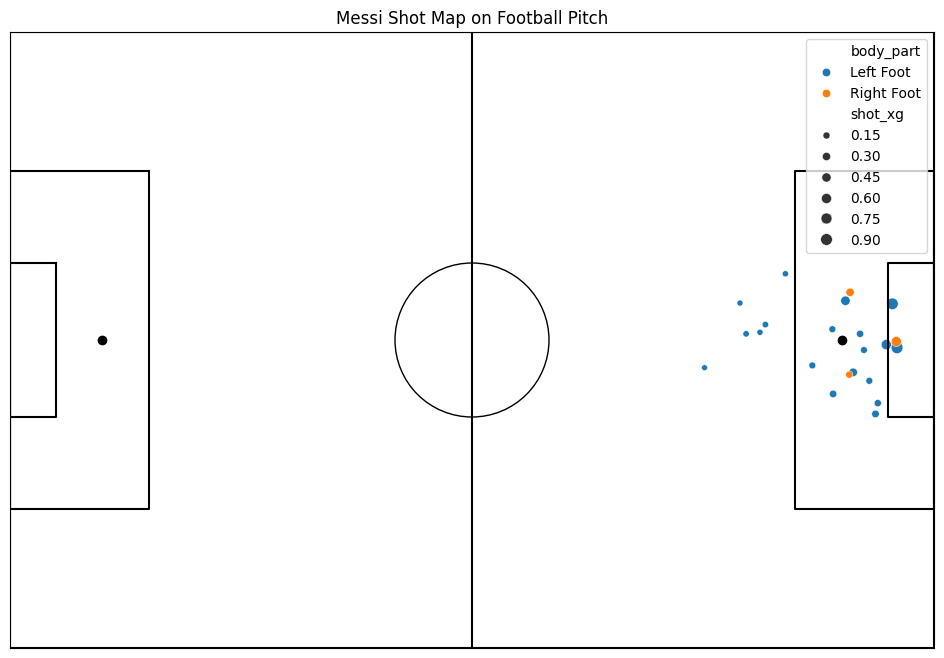

In [ ]:
#Shot Map on Football Pitch for Shot Outcome = goal (Scatter Plot of 'x' and 'y')

#filter dataframe
shots_goals= messi[messi['shot_outcome'] == 'Goal']

fig, ax = plt.subplots(figsize=(12, 8))
ax = draw_pitch(ax)

# Plot shots colored by xG
sc = sns.scatterplot(
    data = shots_goals, 
    x= 'x_coordinate',
    y='y_coordinate', 
    hue= 'body_part',
    size='shot_xg'
    )

#plt.colorbar(sc, label='Shot Outcome')
plt.title('Messi Shot Map on Football Pitch')
plt.show()

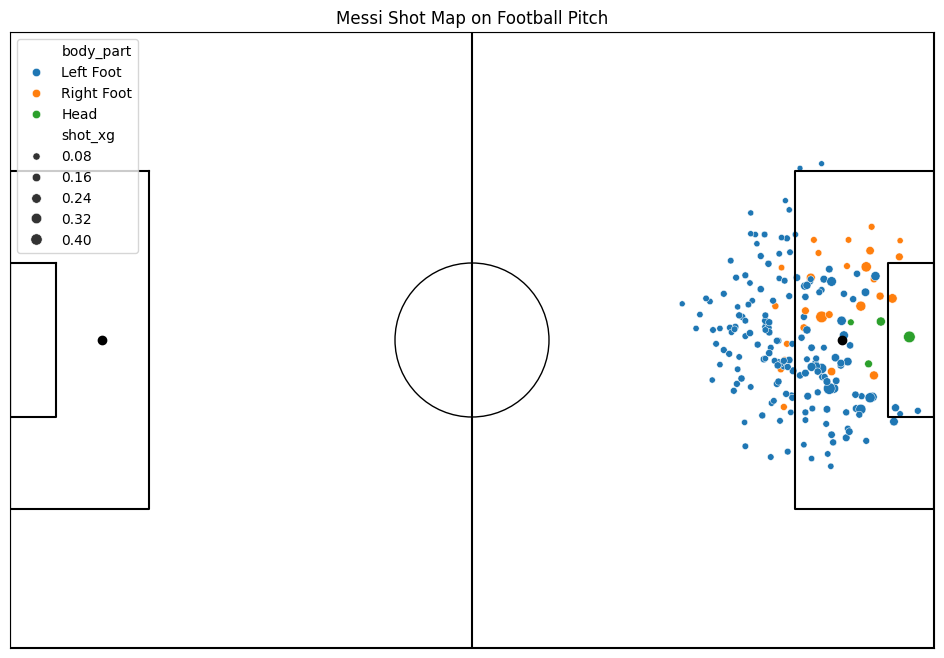

In [76]:
#6. Player Shot Map on Football Pitch for Shot Outcome != goal (Scatter Plot of 'x' and 'y')

#filter dataframe
shots_missed= messi[messi['shot_outcome'] != 'Goal']

fig, ax = plt.subplots(figsize=(12, 8))
ax = draw_pitch(ax)

# Plot shots colored by xG
sc = sns.scatterplot(data = shots_missed, x= 'x_coordinate',y='y_coordinate', hue= 'body_part',size='shot_xg')

#plt.colorbar(sc, label='Shot Outcome')
plt.title('Messi Shot Map on Football Pitch')
plt.show()

C:\Users\On3B3\AppData\Local\Temp\ipykernel_18628\291236861.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(labels=['Other', '1v1'])


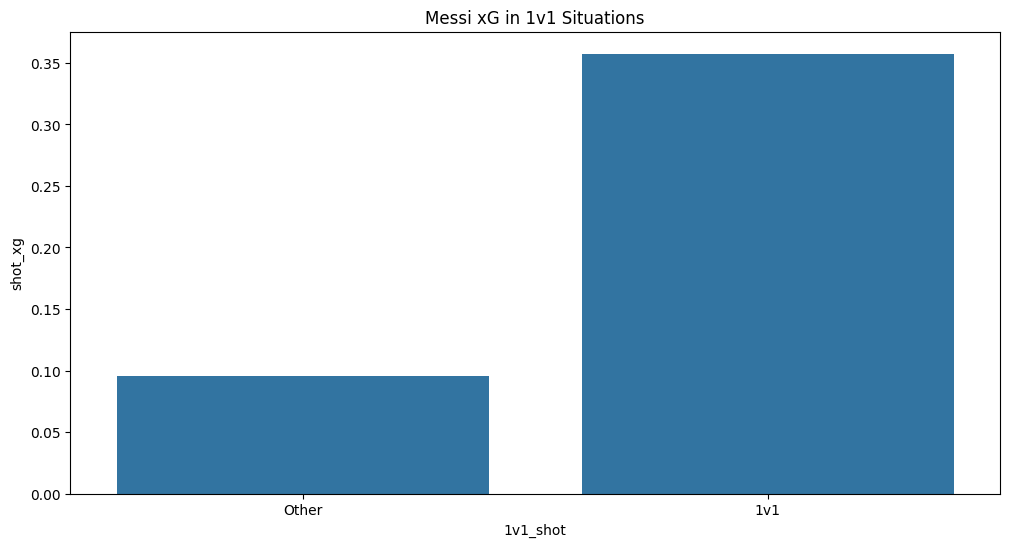

In [89]:
# How likely player is to score in 1v1 situations?
plt.figure(figsize=(12,6))
ax=plt.gca()
sns.barplot(data=messi.groupby('1v1_shot')['shot_xg'].mean())
plt.title("Messi xG in 1v1 Situations")
ax.set_xticklabels(labels=['Other', '1v1'])
plt.show()



In [ ]:
avg_distance_shot_outcome=messi.groupby('shot_outcome').agg({'shot_distance':['mean'],'shot_xg':['mean']}).sort_values(by=('shot_xg','mean'),ascending=False)
messi.groupby('shot_outcome').agg({'shot_distance':['mean'],'shot_xg':['mean']}).sort_values(by=('shot_xg','mean'),ascending=False)

#avg_distance_shot_outcome.unstack(level=0).plot(kind='bar')

,shot_distance,shot_xg
,mean,mean
shot_outcome,,
Saved to Post,3.224903,0.434029
Goal,14.253769,0.268109
Saved,18.955561,0.103641
Post,19.272114,0.089425
Off T,20.027234,0.087209
Blocked,19.637987,0.068963
Saved Off Target,22.249719,0.045951
Wayward,21.633539,0.031257


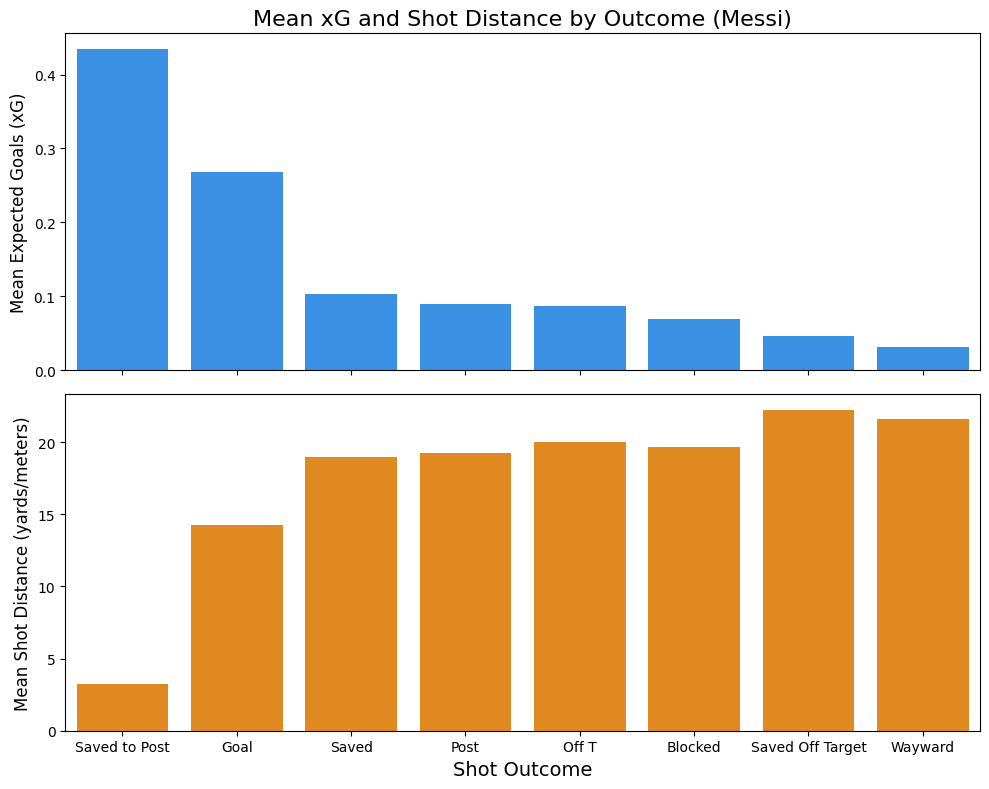

In [105]:
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(10, 8), sharex=True)


sns.barplot(
    x=avg_distance_shot_outcome.index, 
    y=avg_distance_shot_outcome[('shot_xg', 'mean')],  
    ax=ax1, 
    color='dodgerblue'
)
ax1.set_ylabel('Mean Expected Goals (xG)', fontsize=12)
ax1.set_title('Mean xG and Shot Distance by Outcome (Messi)', fontsize=16)
ax1.set_xlabel('')  


sns.barplot(
    x=avg_distance_shot_outcome.index, 
    y=avg_distance_shot_outcome[('shot_distance', 'mean')],  
    ax=ax2, 
    color='darkorange'
)
ax2.set_ylabel('Mean Shot Distance (yards/meters)', fontsize=12)
ax2.set_xlabel('Shot Outcome', fontsize=14)


plt.xticks(rotation=0) 
plt.tight_layout() 
plt.show()

In [110]:
#Number of shots taken per field postion
count_shots_position=messi.groupby('position_name').agg({'position_name':['size'],'shot_xg':['mean']}).sort_values(by=('position_name','size'),ascending=False)
messi.groupby('position_name').agg({'position_name':['size'],'shot_xg':['mean']}).sort_values(by=('position_name','size'),ascending=False)

,position_name,shot_xg
,size,mean
position_name,,
Right Center Forward,71,0.112143
Right Wing,42,0.090172
Center Attacking Midfield,35,0.082508
Center Forward,35,0.132368
Right Attacking Midfield,33,0.109369
Right Midfield,2,0.125545


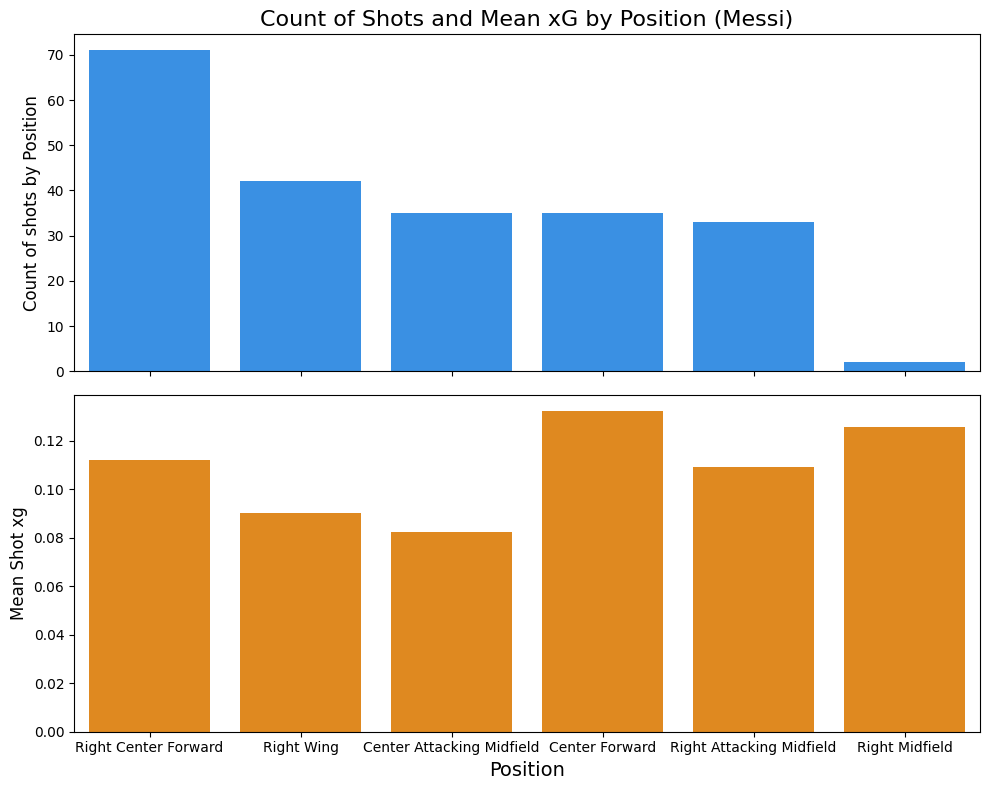

In [112]:
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(10, 8), sharex=True)


sns.barplot(
    x=count_shots_position.index, 
    y=count_shots_position[('position_name', 'size')],  
    ax=ax1, 
    color='dodgerblue'
)
ax1.set_ylabel('Count of shots by Position', fontsize=12)
ax1.set_title('Count of Shots and Mean xG by Position (Messi)', fontsize=16)
ax1.set_xlabel('')  


sns.barplot(
    x=count_shots_position.index, 
    y=count_shots_position[('shot_xg', 'mean')],  
    ax=ax2, 
    color='darkorange'
)
ax2.set_ylabel('Mean Shot xg', fontsize=12)
ax2.set_xlabel('Position', fontsize=14)


plt.xticks(rotation=0) 
plt.tight_layout() 
plt.show()

In [120]:
#Which position did player score the most goals from?
goals_by_position=messi.query("shot_outcome=='Goal'").groupby(['position_name'])['shot_outcome'].count().sort_values(ascending=False)
messi.query("shot_outcome=='Goal'").groupby(['position_name'])['shot_outcome'].count().sort_values(ascending=False)

position_name
Right Center Forward         8
Center Forward               5
Right Attacking Midfield     4
Right Wing                   3
Center Attacking Midfield    2
Name: shot_outcome, dtype: int64

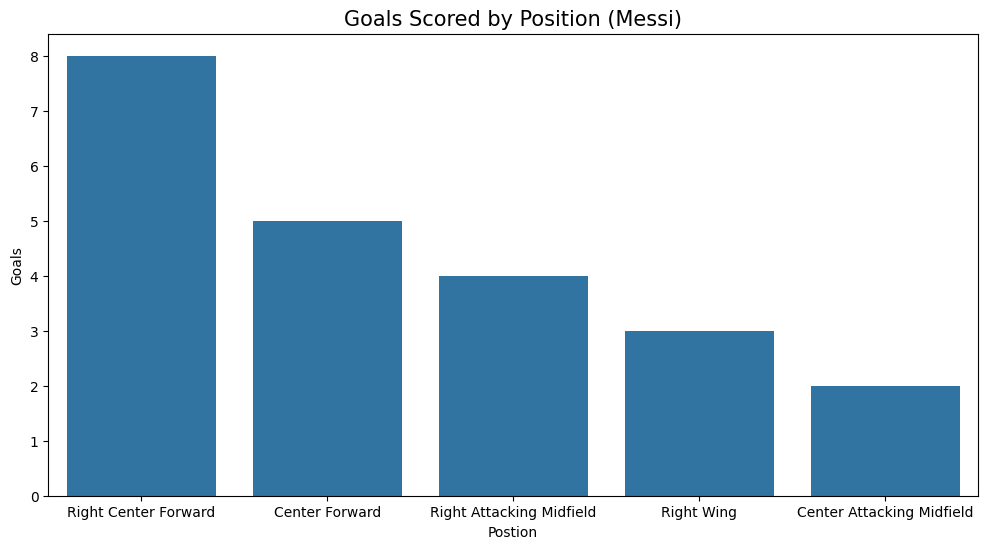

In [127]:
plt.figure(figsize=(12,6))
sns.barplot(goals_by_position)
plt.title("Goals Scored by Position (Messi)",fontsize=15)
plt.ylabel('Goals')
plt.xlabel('Postion')
plt.show()

In [129]:
messi['shot_technique'].value_counts()

shot_technique
Normal           181
Half Volley       19
Volley            13
Lob                3
Overhead Kick      2
Name: count, dtype: int64

In [90]:
messi.head()

,location,type_event,play_pattern,team_name,player_name,position_name,1v1_shot,shot_xg,shot_end_location,shot_technique,body_part,shot_type,shot_outcome,under_pressure,aerial_shot_won,first_time_shot,deflected_shot,open_goal_shot,shot_saved_to_post,source,x_coordinate,y_coordinate,shot_distance,shot_angle
5,"[91.3, 41.3]",Shot,From Free Kick,Paris Saint-Germain,Lionel Andrés Messi Cuccittini,Right Wing,0,0.044275,"[118.8, 36.7, 1.0]",Normal,Left Foot,Free Kick,Saved,0,0,0,0,0,0,ligue1_21_22_shots,91.3,41.3,28.729427,0.253177
10,"[108.8, 28.5]",Shot,Regular Play,Paris Saint-Germain,Lionel Andrés Messi Cuccittini,Right Wing,0,0.049324,"[109.9, 29.7]",Normal,Left Foot,Open Play,Blocked,0,0,0,0,0,0,ligue1_21_22_shots,108.8,28.5,16.052726,0.323785
21,"[106.0, 29.1]",Shot,From Goal Kick,Paris Saint-Germain,Lionel Andrés Messi Cuccittini,Right Wing,0,0.050865,"[118.1, 36.4, 1.7]",Normal,Left Foot,Open Play,Saved,0,0,0,0,0,0,ligue1_21_22_shots,106.0,29.1,17.742886,0.327736
29,"[102.6, 35.4]",Shot,Regular Play,Paris Saint-Germain,Lionel Andrés Messi Cuccittini,Center Forward,0,0.080826,"[117.9, 36.9, 2.1]",Normal,Left Foot,Open Play,Saved,1,0,1,0,0,0,ligue1_21_22_shots,102.6,35.4,17.997778,0.389243
30,"[106.9, 33.0]",Shot,From Corner,Paris Saint-Germain,Lionel Andrés Messi Cuccittini,Center Forward,0,0.198835,"[120.0, 42.9, 0.3]",Normal,Left Foot,Open Play,Goal,0,0,1,0,0,0,ligue1_21_22_shots,106.9,33.0,14.852946,0.433420


In [ ]:
#mbappe.to_csv('../data/processed/mbappe_shot_events.csv',index=False)

In [78]:
#messi.to_csv('../data/processed/messi_shot_events.csv',index=False) 